## 한계점
### 1. 매출액이 정수형이 아님 (해결)
### 2. avg_salary가 null인 기업들은 평균연봉을 활용한 쿼리에서 제외됨 (분석의 질이 떨어짐)

In [2]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [ ]:
remote = mysql.connector.connect(
    host = "*******",
    port = "****",
    user = "****",
    password = "*****",
    database = "*****"
)

cur = remote.cursor()

In [262]:
remote.close()

In [ ]:
benefits = ["건강보험", "연금보험", "퇴직연금", "상해보험", "생명보험", "의료비 지원",
            "진료비 지원", "건강검진", "단체보험", "자녀 학자금 지원", "출산 지원금", "남성출산휴가",
            "육아휴직", "출산휴가", "육아기 근로시간 단축", "자녀 보육비", "보육시설 운영",
            "사내 어린이집", "유연근무제", "재택근무", "원격근무", "유급휴가", "경조사비 지원",
            "경조휴가", "상조 지원", "학자금 대출 지원", "자기 계발비", "도서 구입비", "체력 단련비",
            "체육활동 지원", "여가 지원금", "휴양시설 이용권", "여행비 지원", "문화 활동 지원", "신규 입사자 교육",
            "사내 동호회 운영비", "커피 및 간식 제공", "정기적인 워크숍", "직무 교육", "리더십 개발 프로그램",
            "직원 상담 서비스", "멘토링 프로그램", "재무 상담 서비스", "개인 건강 관리 지원", "운동 시설 제공",
            "영양 상담", "스포츠 대회 참가비", "주택 자금 지원", "차량 유지비 지원", "주유비 지원", "통신비 지원",
            "자기 계발 워크숍", "전문 자격증 취득 지원", "교육비 지원", "해외 연수 프로그램", "연차 휴가", "정기 휴가",
            "정기 상여금", "성과급", "프로젝트 보너스", "유급 병가", "가족 돌봄 휴가", "정기적인 팀 빌딩 행사", "안전 교육",
            "재난 대비 교육", "직장 내 안전 관리", "정신 건강 지원", "이직 지원 프로그램", "채용 추천 보너스", "정규직 전환 지원",
            "인턴십 프로그램", "직원 추천 프로그램", "사내 소통 프로그램", "정기적인 피드백 세션", "직원 설문 조사", "재직자 지원 프로그램",
            "장기 근속 포상", "우수 직원 포상", "인사 고과", "직원 간담회", "사내 뉴스레터", "사내 이벤트", "정기적인 성과 보고",
            "직원 권익 보호", "다양성 및 포용 프로그램", "직원 참여 프로그램", "사내 공모전", "건강 프로그램", "사기 진작 행사",
            "사내 멘토링", "정기적인 교육 세미나", "직무 이동 프로그램", "직원 상조회", "성과 관리 시스템"]

In [ ]:
for idx, benefit in enumerate(benefits):
    if "차량" in benefit:
        print(idx, benefit)

48 차량 유지비 지원


## 1. 공고문에서 가장 많이 언급된 역량은?

어떤 기술이 가장 자주 언급되는가

In [ ]:
select r.recruit_id
from recruit r 
join recruit_tech rt on r.recruit_id = rt.recruit_id 
join tech t on rt.tech_id = t.tech_id
join company c on c.comp_id = r.comp_id
where r.post_title not like '%품질%' 
        and r.post_title not like '%교육%' 
        and r.post_title not like '%기획%' 
        and r.post_title not like '%투자%' 
        and r.post_title not like '%Manager%' 
        and r.post_title not like '%영업%' 
        and r.post_title not like '%마케팅%' 
        and r.post_title not like '%인사%' 
        and r.post_title not like '%총무%' 
        and r.post_title not like '%웹%' 
        and r.post_title not like '%백앤드%' 
        and r.post_title not like '%백엔드%' 
        and r.post_title not like '%기구%' 
        and r.post_title not like '%설계%' 
        and r.post_title not like '%프론트엔드%' 
        and r.post_title not like '%Front-end%' 
        and r.post_title not like '%임베디드%' 
        and r.post_title not like '%담당자%' 
        and r.post_title not like '%PM%'
        and t.tech_name not like '솔루션'
        and t.tech_name not like 'SE'
        and c.sector not like '%품질%'
        and c.sector not like '%교육%'
        and c.sector not like '%기획%'
        and c.sector not like '%투자%'
        and c.sector not like '%고용%'
        and c.sector not like '%영업%'
        and c.sector not like '%마케팅%'
        and c.sector not like '%인사%'
        and c.sector not like '%웹%'
group by r.recruit_id

In [345]:
sql = """select t.tech_name, count(*) as mention_count 
from recruit r 
join recruit_tech rt on r.recruit_id = rt.recruit_id 
join tech t on rt.tech_id = t.tech_id
join company c on c.comp_id = r.comp_id
where r.post_title not like '%품질%' 
        and r.post_title not like '%교육%' 
        and r.post_title not like '%기획%' 
        and r.post_title not like '%투자%' 
        and r.post_title not like '%Manager%' 
        and r.post_title not like '%영업%' 
        and r.post_title not like '%마케팅%' 
        and r.post_title not like '%인사%' 
        and r.post_title not like '%총무%' 
        and r.post_title not like '%웹%' 
        and r.post_title not like '%백앤드%' 
        and r.post_title not like '%백엔드%' 
        and r.post_title not like '%기구%' 
        and r.post_title not like '%설계%' 
        and r.post_title not like '%프론트엔드%' 
        and r.post_title not like '%Front-end%' 
        and r.post_title not like '%임베디드%' 
        and r.post_title not like '%담당자%' 
        and r.post_title not like '%PM%'
        and t.tech_name not like '솔루션'
        and t.tech_name not like 'SE'
        and c.sector not like '%품질%'
        and c.sector not like '%교육%'
        and c.sector not like '%기획%'
        and c.sector not like '%투자%'
        and c.sector not like '%고용%'
        and c.sector not like '%영업%'
        and c.sector not like '%마케팅%'
        and c.sector not like '%인사%'
        and c.sector not like '%웹%'
group by t.tech_name 
order by mention_count desc limit 10;"""


In [346]:
cur.execute(sql)

data1 = cur.fetchall()

data1

[('AI', 175),
 ('C언어', 157),
 ('C++', 145),
 ('AR', 123),
 ('Python', 108),
 ('영어', 87),
 ('통신/네트워크', 82),
 ('컴퓨터비전', 76),
 ('알고리즘', 74),
 ('자율주행', 73)]

In [347]:
df1 = pd.DataFrame(data=data1, columns=["기술명", "빈도"])
df1

,기술명,빈도
0,AI,175
1,C언어,157
2,C++,145
3,AR,123
4,Python,108
5,영어,87
6,통신/네트워크,82
7,컴퓨터비전,76
8,알고리즘,74
9,자율주행,73


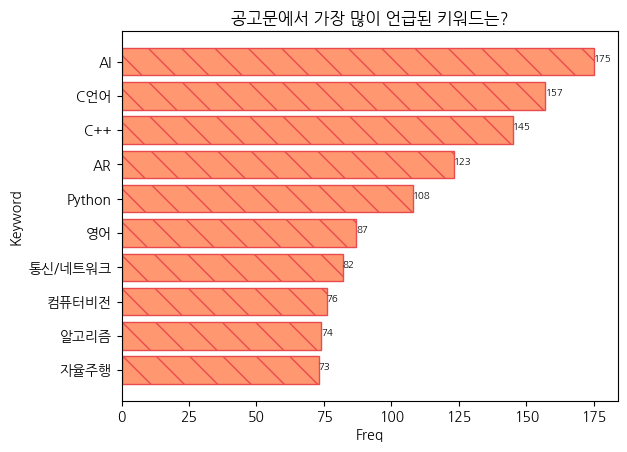

In [348]:
plt.barh(df1["기술명"], df1["빈도"], color='#ff9871', edgecolor='#ea4a4d', hatch='\\')

plt.gca().invert_yaxis()

for index, value in enumerate(df1["빈도"]):
    plt.text(value, index, str(value), fontsize=7)

plt.title('공고문에서 가장 많이 언급된 키워드는?')
plt.xlabel('Freq')
plt.ylabel('Keyword')

plt.show()

## 그렇다면, 'S/W'와 '솔루션'을 제외한 결과는?

In [11]:
sql2 = "select t.tech_name, count(*) as mention_count from recruit r join recruit_tech rt on r.recruit_id = rt.recruit_id join tech t on rt.tech_id = t.tech_id where t.tech_name not like 'S/W' and t.tech_name not like '솔루션' group by t.tech_name order by mention_count desc limit 10;"

In [12]:
cur.execute(sql2)

data2 = cur.fetchall()

data2

[('AI', 288),
 ('C언어', 226),
 ('AR', 215),
 ('C++', 207),
 ('SE', 180),
 ('통신/네트워크', 149),
 ('영어', 148),
 ('자율주행', 143),
 ('Python', 143),
 ('H/W', 127)]

In [13]:
df2 = pd.DataFrame(data=data2, columns=["기술명", "빈도"])
df2

,기술명,빈도
0,AI,288
1,C언어,226
2,AR,215
3,C++,207
4,SE,180
5,통신/네트워크,149
6,영어,148
7,자율주행,143
8,Python,143
9,H/W,127


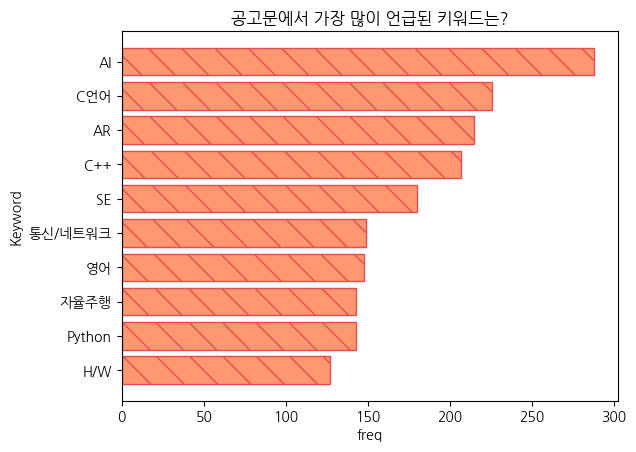

In [14]:
plt.barh(df2["기술명"], df2["빈도"], color='#ff9871', edgecolor='#ea4a4d', hatch='\\')

plt.gca().invert_yaxis()

plt.title('공고문에서 가장 많이 언급된 키워드는?')
plt.xlabel('freq')
plt.ylabel('Keyword')

plt.show()

## 2. 급여와 요구 역량 사이의 관계

더 높은 급여를 제공하는 회사일수록 어떤 기술을 요구할까

In [27]:
no_keywords = ["품질", "교육", "기획", "투자", "Manager", "영업", "마케팅", "인사", "총무", "웹", "백앤드", "백엔드", "기구", "설계", "프론트엔드", "Front-end","임베디드", "담당자", "PM"]

In [28]:
like_conditions = " or ".join([f"r.post_title not like '%{keyword}%'" for keyword in no_keywords])

In [ ]:
cur.execute(f"""
                select c.comp_id, c.comp_name, c.comp_form, c.avg_salary, r.recruit_id, t.tech_name
               from recruit r
               join recruit_tech rt on r.recruit_id=rt.recruit_id
               join tech t on rt.tech_id=t.tech_id
               #join company c on c.comp_id=r.comp_id
               where {like_conditions}
               order by r.recruit_id """)
cur.fetchall()

1. 대기업 중

In [29]:
test = "select c.comp_name, c.comp_form, c.avg_salary, t.tech_name, count(*) as mention_count from company c join recruit r on c.comp_id = r.comp_id join recruit_tech rt on r.recruit_id = rt.recruit_id join tech t on rt.tech_id = t.tech_id where c.avg_salary is not null and c.comp_form like '%대기업%' and t.tech_name not like '%H/W%' and ' or '.join([f'r.post_title not like '%품질%', '%교육%', '%기획%', '%투자%', '%Manager%', '%영업%', '%마케팅%', '%인사%', '%총무%', '%웹%', '%백앤드%', '%백엔드%', '%기구%', '%설계%', '%프론트엔드%', '%Front-end%', '%임베디드%', '%담당자%', '%PM%']) group by c.avg_salary, t.tech_name order by c.avg_salary desc, mention_count desc;"

In [355]:
cur.execute("""select 
    c.comp_name, 
    c.comp_form, 
    c.avg_salary, 
    t.tech_name, 
    count(*) as mention_count
from 
    company c
join 
    recruit r on c.comp_id = r.comp_id
join 
    recruit_tech rt on r.recruit_id = rt.recruit_id
join 
    tech t on rt.tech_id = t.tech_id
where 
    c.avg_salary is not null 
    and c.comp_form like '%대기업%' 
    and t.tech_name not like '%H/W%' 
    and (
        r.post_title not like '%품질%' 
        and r.post_title not like '%교육%' 
        and r.post_title not like '%기획%' 
        and r.post_title not like '%투자%' 
        and r.post_title not like '%Manager%' 
        and r.post_title not like '%영업%' 
        and r.post_title not like '%마케팅%' 
        and r.post_title not like '%인사%' 
        and r.post_title not like '%총무%' 
        and r.post_title not like '%웹%' 
        and r.post_title not like '%백앤드%' 
        and r.post_title not like '%백엔드%' 
        and r.post_title not like '%기구%' 
        and r.post_title not like '%설계%' 
        and r.post_title not like '%프론트엔드%' 
        and r.post_title not like '%Front-end%' 
        and r.post_title not like '%임베디드%' 
        and r.post_title not like '%담당자%' 
        and r.post_title not like '%PM%'
        and t.tech_name not like '솔루션'
        and t.tech_name not like 'SE'
        and c.sector not like '%품질%'
        and c.sector not like '%교육%'
        and c.sector not like '%기획%'
        and c.sector not like '%투자%'
        and c.sector not like '%고용%'
        and c.sector not like '%영업%'
        and c.sector not like '%마케팅%'
        and c.sector not like '%인사%'
        and c.sector not like '%웹%'
    )
group by 
    c.avg_salary, t.tech_name
order by 
    c.avg_salary desc, mention_count desc;""")
data3_large = cur.fetchall()

In [21]:
sql3_large = "select c.comp_name, c.comp_form, c.avg_salary, t.tech_name, count(*) as mention_count from company c join recruit r on c.comp_id = r.comp_id join recruit_tech rt on r.recruit_id = rt.recruit_id join tech t on rt.tech_id = t.tech_id where c.avg_salary is not null and c.comp_form like '%대기업%' and t.tech_name not like '%H/W%' and ' or '.join([f'r.post_title not like '%품질%', '%교육%', '%기획%', '%투자%', '%Manager%', '%영업%', '%마케팅%', '%인사%', '%총무%', '%웹%', '%백앤드%', '%백엔드%', '%기구%', '%설계%', '%프론트엔드%', '%Front-end%', '%임베디드%', '%담당자%', '%PM%']) group by c.avg_salary, t.tech_name order by c.avg_salary desc, mention_count desc;"


In [356]:
cur.execute(sql3_large)

data3_large = cur.fetchall()

증명 쿼리:
1. select comp_name, comp_form, avg_salary from company where avg_salary is not null order by avg_salary desc;

2. select rt.recruit_id, t.tech_id, r.recruit_id, t.tech_name from recruit_tech rt, recruit r, tech t where r.recruit_id = rt.recruit_id and rt.tech_id = t.tech_id and rt.recruit_id = 505;


In [357]:
df3_large = pd.DataFrame(data=data3_large, columns=["기업 이름", "기업 형태", "평균 연봉", "요구 역량", "언급 횟수"])
df3_large

,기업 이름,기업 형태,평균 연봉,요구 역량,언급 횟수
0,현대오토에버(주),"코스피, 대기업, 1000대 기업, 외부감사법인, 주식회사, 수출입 기업",93640000,SE,2
1,현대오토에버(주),"코스피, 대기업, 1000대 기업, 외부감사법인, 주식회사, 수출입 기업",93640000,영어,2
2,현대오토에버(주),"코스피, 대기업, 1000대 기업, 외부감사법인, 주식회사, 수출입 기업",93640000,데이터 사이언티스트,1
3,현대오토에버(주),"코스피, 대기업, 1000대 기업, 외부감사법인, 주식회사, 수출입 기업",93640000,통신/네트워크,1
4,현대오토에버(주),"코스피, 대기업, 1000대 기업, 외부감사법인, 주식회사, 수출입 기업",93640000,머신러닝,1
...,...,...,...,...,...
115,㈜케이티,대기업 (코스피),44897027,C언어,1
116,㈜케이티,대기업 (코스피),44897027,클라우드,1
117,㈜케이티,대기업 (코스피),44897027,Java,1
118,㈜케이티,대기업 (코스피),44897027,Python,1


In [359]:
# 언급횟수가 1인 tech는 제거
res_list = []
for i in df3_large.index:
    count = 0
    #insert_list = []
    tech = df3_large.iloc[i][3]
    for j in df3_large.index:
        insert_list = []
        if tech == df3_large.iloc[j][3]:
            count += 1
    if count > 2:
        insert_list.append(df3_large.iloc[i][3])
        match df3_large.iloc[i][2]//10000000:
            case 9:
                salary = '9천만원'
            case 8:
                salary = '8천만원'
            case 7:
                salary = '7천만원'
            case 6:
                salary = '6천만원'
            case 5:
                salary = '5천만원'
            case 4:
                salary = '4천만원'
            case 3:
                salary = '3천만원'
            case 2:
                salary = '2천만원'
            case 1:
                salary = '1천만원'
            case default:
                salary = '이외'
        if df3_large.iloc[i][3] == 'S/W' or df3_large.iloc[i][3] == '솔루션':
            continue
        else:
            insert_list.append(df3_large.iloc[i][2])
            insert_list.append(salary)
            res_list.append(insert_list)

print(len(res_list))
res_list

/tmp/ipykernel_7481/543348312.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tech = df3_large.iloc[i][3]
/tmp/ipykernel_7481/543348312.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if tech == df3_large.iloc[j][3]:
/tmp/ipykernel_7481/543348312.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  insert_list.append(df3_large.iloc[i][3])
/tmp/ipykernel_7481/543348312.py:13: FutureWarning: Series.__getitem__ treating keys as

42


[['SE', np.int64(93640000), '9천만원'],
 ['영어', np.int64(93640000), '9천만원'],
 ['통신/네트워크', np.int64(93640000), '9천만원'],
 ['알고리즘', np.int64(93640000), '9천만원'],
 ['클라우드', np.int64(93640000), '9천만원'],
 ['AI', np.int64(93640000), '9천만원'],
 ['통신/네트워크', np.int64(88350000), '8천만원'],
 ['C++', np.int64(88350000), '8천만원'],
 ['C언어', np.int64(88350000), '8천만원'],
 ['Linux', np.int64(88350000), '8천만원'],
 ['AI', np.int64(88350000), '8천만원'],
 ['통신/네트워크', np.int64(73221520), '7천만원'],
 ['알고리즘', np.int64(73221520), '7천만원'],
 ['C++', np.int64(73221520), '7천만원'],
 ['C언어', np.int64(73221520), '7천만원'],
 ['클라우드', np.int64(73221520), '7천만원'],
 ['Linux', np.int64(73221520), '7천만원'],
 ['AI', np.int64(73221520), '7천만원'],
 ['Python', np.int64(73221520), '7천만원'],
 ['R', np.int64(73221520), '7천만원'],
 ['SQL', np.int64(73221520), '7천만원'],
 ['AI', np.int64(72178755), '7천만원'],
 ['AI', np.int64(71500543), '7천만원'],
 ['AI', np.int64(71115950), '7천만원'],
 ['통신/네트워크', np.int64(70419980), '7천만원'],
 ['R', np.int64(70419980), '7천만원'

In [360]:
res = pd.DataFrame(data=res_list, columns=["요구 역량", "평균 연봉", "연봉 txt"])
res

,요구 역량,평균 연봉,연봉 txt
0,SE,93640000,9천만원
1,영어,93640000,9천만원
2,통신/네트워크,93640000,9천만원
3,알고리즘,93640000,9천만원
4,클라우드,93640000,9천만원
5,AI,93640000,9천만원
6,통신/네트워크,88350000,8천만원
7,C++,88350000,8천만원
8,C언어,88350000,8천만원
9,Linux,88350000,8천만원


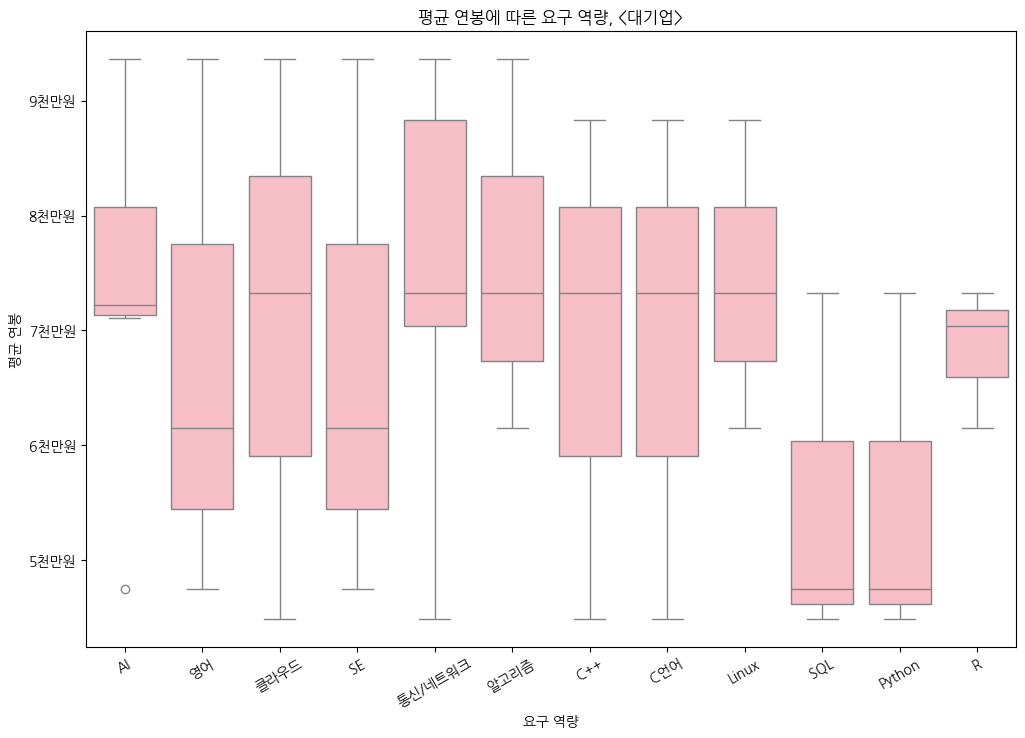

In [361]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# 각 기술에 대한 최댓값을 계산하여 새로운 컬럼을 추가
max_values = res.groupby('요구 역량')['평균 연봉'].max()

# 최댓값에 따라 내림차순으로 정렬
sorted_techs = max_values.sort_values(ascending=False).index

# # 각 기술별 IQR (Interquartile Range) 계산
# iqr_values = res.groupby('요구 역량')['평균 연봉'].quantile(0.75) - res.groupby('요구 역량')['평균 연봉'].quantile(0.25)

# # IQR을 기준으로 내림차순 정렬
# sorted_order = iqr_values.sort_values(ascending=False).index
# Box Plot 생성
plt.figure(figsize=(12, 8))
sns.boxplot(x=res['요구 역량'], y=res['평균 연봉'], order=sorted_techs, color="lightpink")
plt.xticks(rotation=30)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e7)}천만원'))
plt.title('평균 연봉에 따른 요구 역량, <대기업>')
plt.show()


In [53]:
max_values

요구 역량
AI         93640000
API        93640000
AR         93640000
AWS        93640000
C#         88350000
C++        88350000
C언어        88350000
Java       73221520
Kafka      93640000
Linux      88350000
Python     73221520
R          73221520
ROS        93640000
SE         93640000
SQL        73221520
머신러닝       93640000
빅데이터       93640000
아키텍쳐       93640000
알고리즘       93640000
영어         93640000
인프라        93640000
임베디드       93640000
클라우드       93640000
통신/네트워크    93640000
Name: 평균 연봉, dtype: int64

2. 중견기업 중

In [15]:
sql3_medium = "select c.comp_name, c.comp_form, c.avg_salary, t.tech_name, count(*) as mention_count from company c join recruit r on c.comp_id = r.comp_id join recruit_tech rt on r.recruit_id = rt.recruit_id join tech t on rt.tech_id = t.tech_id where c.avg_salary is not null and c.comp_form like '%중견%' group by c.avg_salary, t.tech_name order by c.avg_salary desc, mention_count desc;"

In [41]:
cur.execute(cur.execute("""select 
    c.comp_name, 
    c.comp_form, 
    c.avg_salary, 
    t.tech_name, 
    count(*) as mention_count
from 
    company c
join 
    recruit r on c.comp_id = r.comp_id
join 
    recruit_tech rt on r.recruit_id = rt.recruit_id
join 
    tech t on rt.tech_id = t.tech_id
where 
    c.avg_salary is not null 
    and c.comp_form like '%중견%' 
    and t.tech_name not like '%H/W%' 
    and (
        r.post_title not like '%품질%' 
        and r.post_title not like '%교육%' 
        and r.post_title not like '%기획%' 
        and r.post_title not like '%투자%' 
        and r.post_title not like '%Manager%' 
        and r.post_title not like '%영업%' 
        and r.post_title not like '%마케팅%' 
        and r.post_title not like '%인사%' 
        and r.post_title not like '%총무%' 
        and r.post_title not like '%웹%' 
        and r.post_title not like '%백앤드%' 
        and r.post_title not like '%백엔드%' 
        and r.post_title not like '%기구%' 
        and r.post_title not like '%설계%' 
        and r.post_title not like '%프론트엔드%' 
        and r.post_title not like '%Front-end%' 
        and r.post_title not like '%임베디드%' 
        and r.post_title not like '%담당자%' 
        and r.post_title not like '%PM%'
    )
group by 
    c.avg_salary, t.tech_name
order by 
    c.avg_salary desc, mention_count desc;"""))

data3_medium = cur.fetchall()

In [42]:
data3_medium

[('(주)유니트론텍', '코스닥, 중견기업, 외부감사법인, 주식회사, 수출입 기업', 75910000, '통신/네트워크', 1),
 ('(주)유니트론텍', '코스닥, 중견기업, 외부감사법인, 주식회사, 수출입 기업', 75910000, '딥러닝', 1),
 ('(주)유니트론텍', '코스닥, 중견기업, 외부감사법인, 주식회사, 수출입 기업', 75910000, 'C++', 1),
 ('(주)유니트론텍', '코스닥, 중견기업, 외부감사법인, 주식회사, 수출입 기업', 75910000, 'C언어', 1),
 ('(주)유니트론텍', '코스닥, 중견기업, 외부감사법인, 주식회사, 수출입 기업', 75910000, '임베디드', 1),
 ('(주)유니트론텍', '코스닥, 중견기업, 외부감사법인, 주식회사, 수출입 기업', 75910000, '자율주행', 1),
 ('(주)유니트론텍', '코스닥, 중견기업, 외부감사법인, 주식회사, 수출입 기업', 75910000, 'AR', 1),
 ('(주)유니트론텍', '코스닥, 중견기업, 외부감사법인, 주식회사, 수출입 기업', 75910000, 'Linux', 1),
 ('(주)유니트론텍', '코스닥, 중견기업, 외부감사법인, 주식회사, 수출입 기업', 75910000, 'VR', 1),
 ('(주)유니트론텍', '코스닥, 중견기업, 외부감사법인, 주식회사, 수출입 기업', 75910000, 'ROS', 1),
 ('(주)유니트론텍', '코스닥, 중견기업, 외부감사법인, 주식회사, 수출입 기업', 75910000, 'SLAM', 1),
 ('(주)우아한형제들', '중견기업 (비상장)', 68597177, '.NET', 1),
 ('(주)우아한형제들', '중견기업 (비상장)', 68597177, '머신러닝', 1),
 ('(주)우아한형제들', '중견기업 (비상장)', 68597177, 'ASP', 1),
 ('(주)우아한형제들', '중견기업 (비상장)', 68597177, 'ASP.NET', 1),
 ('(주)우아한형제들', '중

In [54]:
df3_medium = pd.DataFrame(data=data3_medium, columns=["기업 이름", "기업 형태", "평균 연봉", "요구 역량", "언급 횟수"])
df3_medium

,기업 이름,기업 형태,평균 연봉,요구 역량,언급 횟수
0,(주)유니트론텍,"코스닥, 중견기업, 외부감사법인, 주식회사, 수출입 기업",75910000,통신/네트워크,1
1,(주)유니트론텍,"코스닥, 중견기업, 외부감사법인, 주식회사, 수출입 기업",75910000,딥러닝,1
2,(주)유니트론텍,"코스닥, 중견기업, 외부감사법인, 주식회사, 수출입 기업",75910000,C++,1
3,(주)유니트론텍,"코스닥, 중견기업, 외부감사법인, 주식회사, 수출입 기업",75910000,C언어,1
4,(주)유니트론텍,"코스닥, 중견기업, 외부감사법인, 주식회사, 수출입 기업",75910000,임베디드,1
...,...,...,...,...,...
148,(주)아데코코리아,"중견기업, 외국인 투자기업, 주식회사, 외부감사법인",32090849,AR,1
149,(주)아데코코리아,"중견기업, 외국인 투자기업, 주식회사, 외부감사법인",32090849,DevOps,1
150,(주)아데코코리아,"중견기업, 외국인 투자기업, 주식회사, 외부감사법인",32090849,AI,1
151,(주)아데코코리아,"중견기업, 외국인 투자기업, 주식회사, 외부감사법인",32090849,Python,1


In [225]:
# 언급횟수가 1인 tech는 제거
res_list2 = []

for i in df3_medium.index:
    count = 0
    tech = df3_medium.iloc[i][3]
    for j in df3_medium.index:
        insert_list = []
        if tech == df3_medium.iloc[j][3]:
            count += 1
    if count > 5:
        insert_list.append(df3_medium.iloc[i][3])
        match df3_medium.iloc[i][2]//10000000:
            case 9:
                salary = '9천만원'
            case 8:
                salary = '8천만원'
            case 7:
                salary = '7천만원'
            case 6:
                salary = '6천만원'
            case 5:
                salary = '5천만원'
            case 4:
                salary = '4천만원'
            case 3:
                salary = '3천만원'
            case 2:
                salary = '2천만원'
            case 1:
                salary = '1천만원'
            case default:
                salary = '이외'
        if df3_medium.iloc[i][3] == 'S/W' or df3_medium.iloc[i][3] == '솔루션':
            continue
        else:
            insert_list.append(df3_medium.iloc[i][2])
            insert_list.append(salary)
            res_list2.append(insert_list)

print(len(res_list2))
res_list2

/tmp/ipykernel_7481/628051617.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tech = df3_medium.iloc[i][3]
/tmp/ipykernel_7481/628051617.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if tech == df3_medium.iloc[j][3]:
/tmp/ipykernel_7481/628051617.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  insert_list.append(df3_medium.iloc[i][3])
/tmp/ipykernel_7481/628051617.py:13: FutureWarning: Series.__getitem__ treating keys

44


[['C++', np.int64(75910000), '7천만원'],
 ['C언어', np.int64(75910000), '7천만원'],
 ['AR', np.int64(75910000), '7천만원'],
 ['ROS', np.int64(75910000), '7천만원'],
 ['Python', np.int64(63419976), '6천만원'],
 ['C++', np.int64(62740000), '6천만원'],
 ['C언어', np.int64(62740000), '6천만원'],
 ['Python', np.int64(62740000), '6천만원'],
 ['ROS', np.int64(62740000), '6천만원'],
 ['AR', np.int64(62740000), '6천만원'],
 ['C#', np.int64(61510000), '6천만원'],
 ['C언어', np.int64(61510000), '6천만원'],
 ['Python', np.int64(61510000), '6천만원'],
 ['C#', np.int64(60458676), '6천만원'],
 ['C++', np.int64(60458676), '6천만원'],
 ['C언어', np.int64(60458676), '6천만원'],
 ['Python', np.int64(60458676), '6천만원'],
 ['ROS', np.int64(60458676), '6천만원'],
 ['AR', np.int64(55108581), '5천만원'],
 ['AR', np.int64(55108580), '5천만원'],
 ['C언어', np.int64(54278080), '5천만원'],
 ['C++', np.int64(54278080), '5천만원'],
 ['ROS', np.int64(54278080), '5천만원'],
 ['C#', np.int64(54278080), '5천만원'],
 ['C#', np.int64(53924647), '5천만원'],
 ['C++', np.int64(53924647), '5천만원'],
 ['C언어',

In [226]:
res2 = pd.DataFrame(data=res_list2, columns=["요구 역량", "평균 연봉", "연봉 txt"])
res2

,요구 역량,평균 연봉,연봉 txt
0,C++,75910000,7천만원
1,C언어,75910000,7천만원
2,AR,75910000,7천만원
3,ROS,75910000,7천만원
4,Python,63419976,6천만원
5,C++,62740000,6천만원
6,C언어,62740000,6천만원
7,Python,62740000,6천만원
8,ROS,62740000,6천만원
9,AR,62740000,6천만원


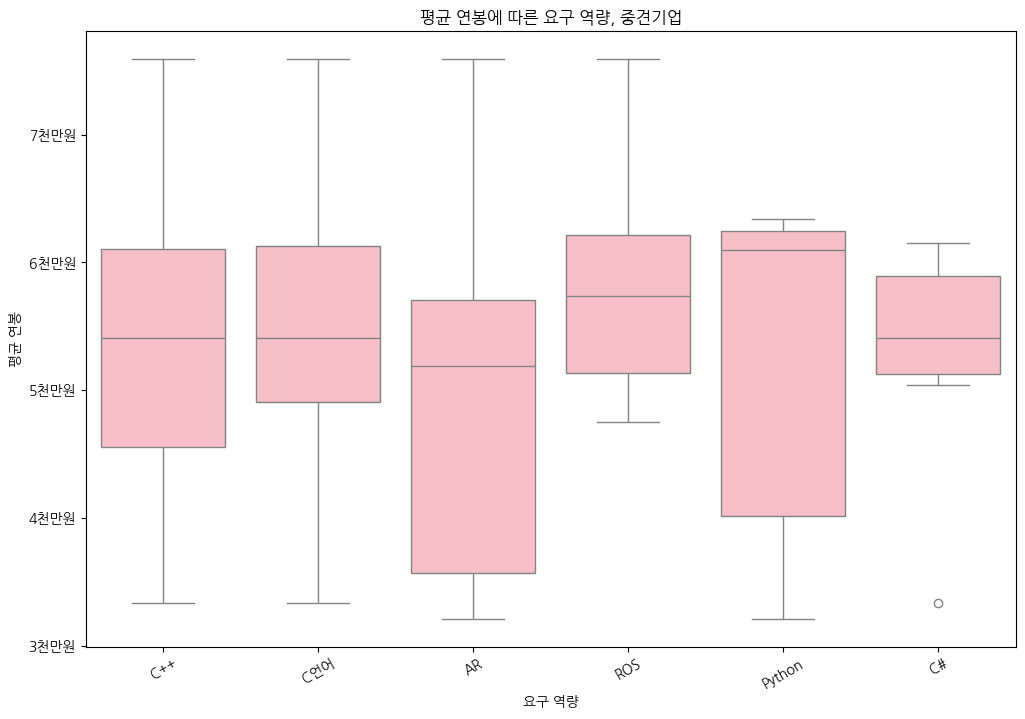

In [227]:
# # 각 기술별 IQR (Interquartile Range) 계산
# iqr_values = res2.groupby('요구 역량')['평균 연봉'].quantile(0.75) - res2.groupby('요구 역량')['평균 연봉'].quantile(0.25)

# # IQR을 기준으로 내림차순 정렬
# sorted_order = iqr_values.sort_values(ascending=False).index

# Box Plot 생성
plt.figure(figsize=(12, 8))
sns.boxplot(x=res2['요구 역량'], y=res2['평균 연봉'], color="lightpink")
plt.xticks(rotation=20)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e7)}천만원'))
plt.xticks(rotation=30)
plt.title('평균 연봉에 따른 요구 역량, 중견기업')
plt.show()

3. 중소기업 중

In [145]:
sql3_tiny = "select c.comp_name, c.comp_form, c.avg_salary, t.tech_name, count(*) as mention_count from company c join recruit r on c.comp_id = r.comp_id join recruit_tech rt on r.recruit_id = rt.recruit_id join tech t on rt.tech_id = t.tech_id where c.avg_salary is not null and c.comp_form like '%중소%' group by c.avg_salary, t.tech_name order by c.avg_salary desc, mention_count desc limit 70;"

In [68]:
cur.execute("""select 
    c.comp_name, 
    c.comp_form, 
    c.avg_salary, 
    t.tech_name, 
    count(*) as mention_count
from 
    company c
join 
    recruit r on c.comp_id = r.comp_id
join 
    recruit_tech rt on r.recruit_id = rt.recruit_id
join 
    tech t on rt.tech_id = t.tech_id
where 
    c.avg_salary is not null 
    and c.comp_form like '%중소%' 
    and t.tech_name not like '%H/W%' 
    and (
        r.post_title not like '%품질%' 
        and r.post_title not like '%교육%' 
        and r.post_title not like '%기획%' 
        and r.post_title not like '%투자%' 
        and r.post_title not like '%Manager%' 
        and r.post_title not like '%영업%' 
        and r.post_title not like '%마케팅%' 
        and r.post_title not like '%인사%' 
        and r.post_title not like '%총무%' 
        and r.post_title not like '%웹%' 
        and r.post_title not like '%백앤드%' 
        and r.post_title not like '%백엔드%' 
        and r.post_title not like '%기구%' 
        and r.post_title not like '%설계%' 
        and r.post_title not like '%프론트엔드%' 
        and r.post_title not like '%Front-end%' 
        and r.post_title not like '%임베디드%' 
        and r.post_title not like '%담당자%' 
        and r.post_title not like '%PM%'
    )
group by 
    c.avg_salary, t.tech_name
order by 
    c.avg_salary desc, mention_count desc limit 70;""")

data3_tiny = cur.fetchall()

In [69]:
df3_tiny = pd.DataFrame(data=data3_tiny, columns=["기업 이름", "기업 형태", "평균 연봉", "요구 역량", "언급 횟수"])
df3_tiny

,기업 이름,기업 형태,평균 연봉,요구 역량,언급 횟수
0,(주)넥스틴,"코스닥, 중소기업, 스타트업",93120000,C#,1
1,(주)넥스틴,"코스닥, 중소기업, 스타트업",93120000,AR,1
2,(주)넥스틴,"코스닥, 중소기업, 스타트업",93120000,WPF,1
3,(주)넥스틴,"코스닥, 중소기업, 스타트업",93120000,C언어,1
4,(주)넥스틴,"코스닥, 중소기업, 스타트업",93120000,영어,1
...,...,...,...,...,...
65,(주)니어스랩,"중소기업, 스타트업, 주식회사, 연구소, 병역특례 인증업체",69740000,Android,1
66,(주)니어스랩,"중소기업, 스타트업, 주식회사, 연구소, 병역특례 인증업체",69740000,SE,1
67,(주)니어스랩,"중소기업, 스타트업, 주식회사, 연구소, 병역특례 인증업체",69740000,API,1
68,(주)니어스랩,"중소기업, 스타트업, 주식회사, 연구소, 병역특례 인증업체",69740000,iOS,1


In [219]:
# 언급횟수가 5인 tech는 제거
res_list3 = []

for i in df3_tiny.index:
    count = 0
    tech = df3_tiny.iloc[i][3]
    for j in df3_tiny.index:
        insert_list = []
        if tech == df3_tiny.iloc[j][3]:
            count += 1
    if count > 2:
        insert_list.append(df3_tiny.iloc[i][3])
        match df3_tiny.iloc[i][2]//10000000:
            case 9:
                salary = '9천만원'
            case 8:
                salary = '8천만원'
            case 7:
                salary = '7천만원'
            case 6:
                salary = '6천만원'
            case 5:
                salary = '5천만원'
            case 4:
                salary = '4천만원'
            case 3:
                salary = '3천만원'
            case 2:
                salary = '2천만원'
            case 1:
                salary = '1천만원'
            case default:
                salary = '이외'
        if df3_tiny.iloc[i][3] == 'S/W' or df3_tiny.iloc[i][3] == '솔루션':
            continue
        else:
            insert_list.append(df3_tiny.iloc[i][2])
            insert_list.append(salary)
            res_list3.append(insert_list)

print(len(res_list3))
res_list3

23


/tmp/ipykernel_7481/1597877468.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tech = df3_tiny.iloc[i][3]
/tmp/ipykernel_7481/1597877468.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if tech == df3_tiny.iloc[j][3]:
/tmp/ipykernel_7481/1597877468.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  insert_list.append(df3_tiny.iloc[i][3])
/tmp/ipykernel_7481/1597877468.py:13: FutureWarning: Series.__getitem__ treating keys a

[['C#', np.int64(93120000), '9천만원'],
 ['AR', np.int64(93120000), '9천만원'],
 ['C언어', np.int64(93120000), '9천만원'],
 ['알고리즘', np.int64(93120000), '9천만원'],
 ['C++', np.int64(85900000), '8천만원'],
 ['C#', np.int64(85900000), '8천만원'],
 ['C언어', np.int64(85900000), '8천만원'],
 ['SE', np.int64(85900000), '8천만원'],
 ['C언어', np.int64(75730000), '7천만원'],
 ['AR', np.int64(75730000), '7천만원'],
 ['C++', np.int64(75730000), '7천만원'],
 ['C#', np.int64(75730000), '7천만원'],
 ['C++', np.int64(74910000), '7천만원'],
 ['알고리즘', np.int64(74910000), '7천만원'],
 ['AR', np.int64(74910000), '7천만원'],
 ['C언어', np.int64(74910000), '7천만원'],
 ['SE', np.int64(74910000), '7천만원'],
 ['알고리즘', np.int64(70530000), '7천만원'],
 ['C++', np.int64(70530000), '7천만원'],
 ['C언어', np.int64(70530000), '7천만원'],
 ['C#', np.int64(70530000), '7천만원'],
 ['AR', np.int64(69740000), '6천만원'],
 ['SE', np.int64(69740000), '6천만원']]

In [220]:
res3 = pd.DataFrame(data=res_list3, columns=["요구 역량", "평균 연봉", "연봉 txt"])
res3

,요구 역량,평균 연봉,연봉 txt
0,C#,93120000,9천만원
1,AR,93120000,9천만원
2,C언어,93120000,9천만원
3,알고리즘,93120000,9천만원
4,C++,85900000,8천만원
5,C#,85900000,8천만원
6,C언어,85900000,8천만원
7,SE,85900000,8천만원
8,C언어,75730000,7천만원
9,AR,75730000,7천만원


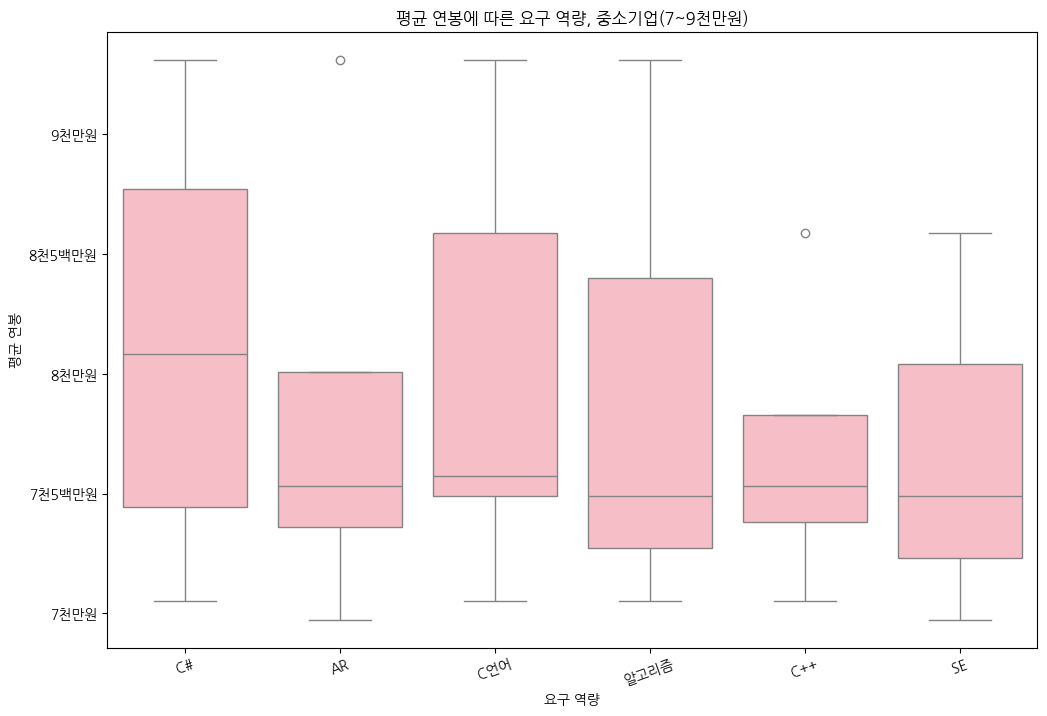

In [221]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=res3['요구 역량'], y=res3['평균 연봉'], color="lightpink")
plt.xticks(rotation=20)
ax = plt.gca()
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(
        lambda x, _: f'{int(x/1e7)}천{(f"{int((x/1e6)%10)}백만원" if int((x/1e6)%10) != 0 else "만원")}'
    )
)
plt.title('평균 연봉에 따른 요구 역량, 중소기업(7~9천만원)')
plt.show()

In [157]:
sql3_tiny2 = "select c.comp_name, c.comp_form, c.avg_salary, t.tech_name, count(*) as mention_count from company c join recruit r on c.comp_id = r.comp_id join recruit_tech rt on r.recruit_id = rt.recruit_id join tech t on rt.tech_id = t.tech_id where c.avg_salary is not null and c.comp_form like '%중소%' group by c.avg_salary, t.tech_name order by c.avg_salary, mention_count desc limit 70;"

In [91]:
cur.execute("""select 
    c.comp_name, 
    c.comp_form, 
    c.avg_salary, 
    t.tech_name, 
    count(*) as mention_count
from 
    company c
join 
    recruit r on c.comp_id = r.comp_id
join 
    recruit_tech rt on r.recruit_id = rt.recruit_id
join 
    tech t on rt.tech_id = t.tech_id
where 
    c.avg_salary is not null 
    and c.comp_form like '%중소%' 
    and t.tech_name not like '%H/W%' 
    and (
        r.post_title not like '%품질%' 
        and r.post_title not like '%교육%' 
        and r.post_title not like '%기획%' 
        and r.post_title not like '%투자%' 
        and r.post_title not like '%Manager%' 
        and r.post_title not like '%영업%' 
        and r.post_title not like '%마케팅%' 
        and r.post_title not like '%인사%' 
        and r.post_title not like '%총무%' 
        and r.post_title not like '%웹%' 
        and r.post_title not like '%백앤드%' 
        and r.post_title not like '%백엔드%' 
        and r.post_title not like '%기구%' 
        and r.post_title not like '%설계%' 
        and r.post_title not like '%프론트엔드%' 
        and r.post_title not like '%Front-end%' 
        and r.post_title not like '%임베디드%' 
        and r.post_title not like '%담당자%' 
        and r.post_title not like '%PM%'
    )
    and c.avg_salary between 40000000 and 70000000
group by 
    c.avg_salary, t.tech_name
order by 
    c.avg_salary desc, mention_count desc;""")

data3_tiny2= cur.fetchall()

In [92]:
df3_tiny2 = pd.DataFrame(data=data3_tiny2, columns=["기업 이름", "기업 형태", "평균 연봉", "요구 역량", "언급 횟수"])
df3_tiny2

,기업 이름,기업 형태,평균 연봉,요구 역량,언급 횟수
0,(주)니어스랩,"중소기업, 스타트업, 주식회사, 연구소, 병역특례 인증업체",69740000,딥러닝,2
1,(주)니어스랩,"중소기업, 스타트업, 주식회사, 연구소, 병역특례 인증업체",69740000,클라우드,2
2,(주)니어스랩,"중소기업, 스타트업, 주식회사, 연구소, 병역특례 인증업체",69740000,AR,2
3,(주)니어스랩,"중소기업, 스타트업, 주식회사, 연구소, 병역특례 인증업체",69740000,AI,2
4,(주)니어스랩,"중소기업, 스타트업, 주식회사, 연구소, 병역특례 인증업체",69740000,알고리즘,1
...,...,...,...,...,...
1199,빅버드(주),중소기업,41000000,Python,1
1200,빅버드(주),중소기업,41000000,ROS,1
1201,빅버드(주),중소기업,41000000,영어,1
1202,아이씨뱅큐(주),"중소기업, 주식회사, 수출입 기업",40150000,임베디드,1


In [243]:
# 언급횟수가 1인 tech는 제거
res_list3_1 = []

for i in df3_tiny2.index:
    count = 0
    tech = df3_tiny2.iloc[i][3]
    for j in df3_tiny2.index:
        insert_list = []
        if tech == df3_tiny2.iloc[j][3]:
            count += 1
    if count > 40:
        insert_list.append(df3_tiny2.iloc[i][3])
        match df3_tiny2.iloc[i][2]//10000000:
            case 9:
                salary = '9천만원'
            case 8:
                salary = '8천만원'
            case 7:
                salary = '7천만원'
            case 6:
                salary = '6천만원'
            case 5:
                salary = '5천만원'
            case 4:
                salary = '4천만원'
            case 3:
                salary = '3천만원'
            case 2:
                salary = '2천만원'
            case 1:
                salary = '1천만원'
            case default:
                salary = '이외'
        if df3_tiny2.iloc[i][3] == 'S/W' or df3_tiny2.iloc[i][3] == '솔루션':
            continue
        else:
            insert_list.append(df3_tiny2.iloc[i][2])
            insert_list.append(salary)
            res_list3_1.append(insert_list)

print(len(res_list3_1))
res_list3_1

/tmp/ipykernel_7481/4042304706.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tech = df3_tiny2.iloc[i][3]
/tmp/ipykernel_7481/4042304706.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if tech == df3_tiny2.iloc[j][3]:
/tmp/ipykernel_7481/4042304706.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  insert_list.append(df3_tiny2.iloc[i][3])
/tmp/ipykernel_7481/4042304706.py:13: FutureWarning: Series.__getitem__ treating key

430


[['AR', np.int64(69740000), '6천만원'],
 ['AI', np.int64(69740000), '6천만원'],
 ['C++', np.int64(69740000), '6천만원'],
 ['C언어', np.int64(69740000), '6천만원'],
 ['Python', np.int64(69740000), '6천만원'],
 ['SE', np.int64(69740000), '6천만원'],
 ['C++', np.int64(69622730), '6천만원'],
 ['C언어', np.int64(69622730), '6천만원'],
 ['AI', np.int64(69622730), '6천만원'],
 ['Python', np.int64(69622730), '6천만원'],
 ['SE', np.int64(68780000), '6천만원'],
 ['C++', np.int64(68780000), '6천만원'],
 ['C언어', np.int64(68780000), '6천만원'],
 ['AR', np.int64(68780000), '6천만원'],
 ['AI', np.int64(68780000), '6천만원'],
 ['SE', np.int64(68180000), '6천만원'],
 ['AR', np.int64(68180000), '6천만원'],
 ['AI', np.int64(68180000), '6천만원'],
 ['통신/네트워크', np.int64(68180000), '6천만원'],
 ['C++', np.int64(68180000), '6천만원'],
 ['C언어', np.int64(68180000), '6천만원'],
 ['SE', np.int64(67570000), '6천만원'],
 ['C++', np.int64(67570000), '6천만원'],
 ['C언어', np.int64(67570000), '6천만원'],
 ['AR', np.int64(67570000), '6천만원'],
 ['통신/네트워크', np.int64(67510000), '6천만원'],
 ['SE', np

In [244]:
res3_1 = pd.DataFrame(data=res_list3_1, columns=["요구 역량", "평균 연봉", "연봉 txt"])
res3_1

,요구 역량,평균 연봉,연봉 txt
0,AR,69740000,6천만원
1,AI,69740000,6천만원
2,C++,69740000,6천만원
3,C언어,69740000,6천만원
4,Python,69740000,6천만원
...,...,...,...
425,영어,41110000,4천만원
426,SE,41000000,4천만원
427,AR,41000000,4천만원
428,Python,41000000,4천만원


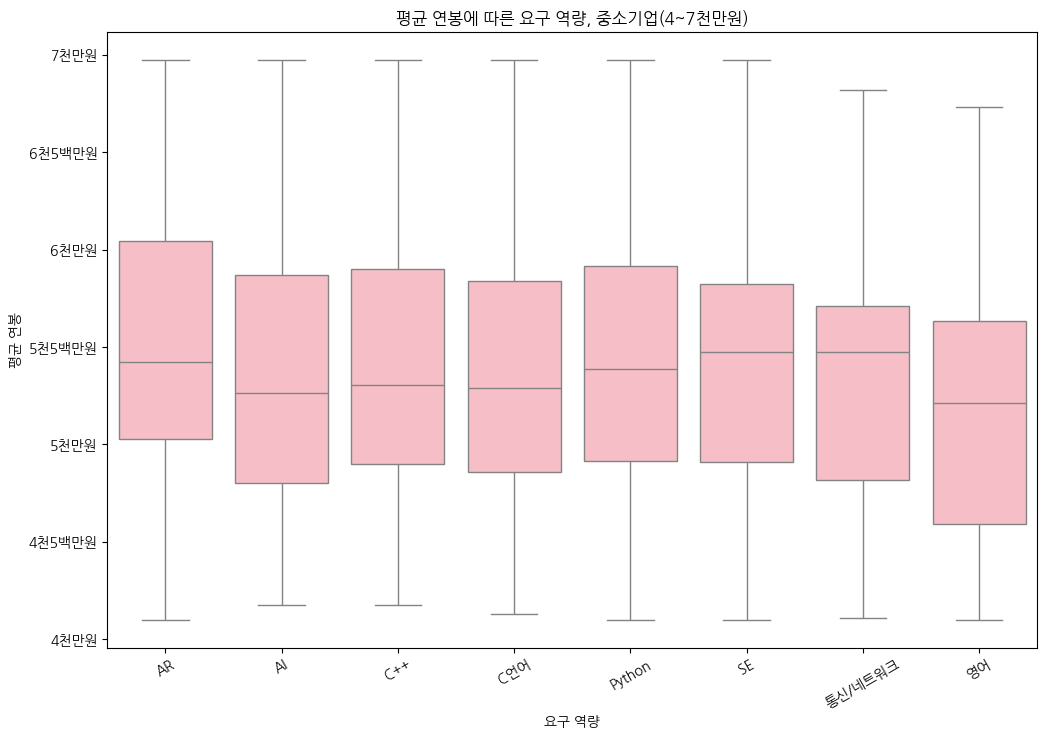

In [245]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=res3_1['요구 역량'], y=res3_1['평균 연봉'], color="lightpink")
plt.xticks(rotation=20)
ax = plt.gca()
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(
        lambda x, _: f'{int(x/1e7)}천{(f"{int((x/1e6)%10)}백만원" if int((x/1e6)%10) != 0 else "만원")}'
    )
)
plt.xticks(rotation=30)
plt.title('평균 연봉에 따른 요구 역량, 중소기업(4~7천만원)')
plt.show()

In [174]:
sql3_tiny3 = "select c.comp_name, c.comp_form, c.avg_salary, t.tech_name, count(*) as mention_count from company c join recruit r on c.comp_id = r.comp_id join recruit_tech rt on r.recruit_id = rt.recruit_id join tech t on rt.tech_id = t.tech_id where c.avg_salary is not null and c.comp_form like '%중소%' and c.avg_salary between 45000000 and 55000000 group by c.avg_salary, t.tech_name order by c.avg_salary, mention_count desc limit 70;"

In [106]:
cur.execute("""select 
    c.comp_name, 
    c.comp_form, 
    c.avg_salary, 
    t.tech_name, 
    count(*) as mention_count
from 
    company c
join 
    recruit r on c.comp_id = r.comp_id
join 
    recruit_tech rt on r.recruit_id = rt.recruit_id
join 
    tech t on rt.tech_id = t.tech_id
where 
    c.avg_salary is not null 
    and c.comp_form like '%중소%' 
    and t.tech_name not like '%H/W%' 
    and (
        r.post_title not like '%품질%' 
        and r.post_title not like '%교육%' 
        and r.post_title not like '%기획%' 
        and r.post_title not like '%투자%' 
        and r.post_title not like '%Manager%' 
        and r.post_title not like '%영업%' 
        and r.post_title not like '%마케팅%' 
        and r.post_title not like '%인사%' 
        and r.post_title not like '%총무%' 
        and r.post_title not like '%웹%' 
        and r.post_title not like '%백앤드%' 
        and r.post_title not like '%백엔드%' 
        and r.post_title not like '%기구%' 
        and r.post_title not like '%설계%' 
        and r.post_title not like '%프론트엔드%' 
        and r.post_title not like '%Front-end%' 
        and r.post_title not like '%임베디드%' 
        and r.post_title not like '%담당자%' 
        and r.post_title not like '%PM%'
    )
    and avg_salary < 40000000
group by 
    c.avg_salary, t.tech_name
order by 
    c.avg_salary desc, mention_count desc;""")

data3_tiny3= cur.fetchall()

data3_tiny3

[('(주)한컴어썸텍', '중소기업, 주식회사, 수출입 기업', 39790000, 'SLAM', 1),
 ('㈜프로랭스', '중소기업 (비상장)', 39504000, '통신/네트워크', 1),
 ('㈜프로랭스', '중소기업 (비상장)', 39504000, '솔루션', 1),
 ('㈜프로랭스', '중소기업 (비상장)', 39504000, 'ERP', 1),
 ('㈜프로랭스', '중소기업 (비상장)', 39504000, '영어', 1),
 ('(주)언맨드솔루션', '중소기업', 38960000, '빅데이터', 1),
 ('(주)언맨드솔루션', '중소기업', 38960000, '솔루션', 1),
 ('(주)언맨드솔루션', '중소기업', 38960000, '자율주행', 1),
 ('(주)언맨드솔루션', '중소기업', 38960000, 'AI', 1),
 ('(주)알오지스틱스', '중소기업, 주식회사', 38906000, '자율주행', 2),
 ('(주)알오지스틱스', '중소기업, 주식회사', 38906000, 'GIS', 2),
 ('(주)알오지스틱스', '중소기업, 주식회사', 38906000, 'Node.js', 2),
 ('(주)알오지스틱스', '중소기업, 주식회사', 38906000, '임베디드', 1),
 ('(주)알오지스틱스', '중소기업, 주식회사', 38906000, '컴퓨터비전', 1),
 ('(주)알오지스틱스', '중소기업, 주식회사', 38906000, 'Tensorflow', 1),
 ('고레로보틱스㈜', '중소기업 (비상장)', 38904410, '자율주행', 2),
 ('고레로보틱스㈜', '중소기업 (비상장)', 38904410, 'ROS', 2),
 ('고레로보틱스㈜', '중소기업 (비상장)', 38904410, 'SLAM', 2),
 ('(주)아임시스템', '중소기업', 38740000, '.NET', 1),
 ('(주)아임시스템', '중소기업', 38740000, '통신/네트워크', 1),
 ('(주)아임시스템', '중소기업', 3874

In [107]:
df3_tiny3 = pd.DataFrame(data=data3_tiny3, columns=["기업 이름", "기업 형태", "평균 연봉", "요구 역량", "언급 횟수"])
df3_tiny3

,기업 이름,기업 형태,평균 연봉,요구 역량,언급 횟수
0,(주)한컴어썸텍,"중소기업, 주식회사, 수출입 기업",39790000,SLAM,1
1,㈜프로랭스,중소기업 (비상장),39504000,통신/네트워크,1
2,㈜프로랭스,중소기업 (비상장),39504000,솔루션,1
3,㈜프로랭스,중소기업 (비상장),39504000,ERP,1
4,㈜프로랭스,중소기업 (비상장),39504000,영어,1
...,...,...,...,...,...
207,드림가이드컴퍼니(주),중소기업,13363556,Git,1
208,드림가이드컴퍼니(주),중소기업,13363556,Linux,1
209,드림가이드컴퍼니(주),중소기업,13363556,Python,1
210,드림가이드컴퍼니(주),중소기업,13363556,ROS,1


In [213]:
# 언급횟수가 1인 tech는 제거
res_list3_2 = []

for i in df3_tiny3.index:
    count = 0
    tech = df3_tiny3.iloc[i][3]
    for j in df3_tiny3.index:
        insert_list = []
        if tech == df3_tiny3.iloc[j][3]:
            count += 1
    if count > 5:
        insert_list.append(df3_tiny3.iloc[i][3])
        match df3_tiny3.iloc[i][2]//10000000:
            case 9:
                salary = '9천만원'
            case 8:
                salary = '8천만원'
            case 7:
                salary = '7천만원'
            case 6:
                salary = '6천만원'
            case 5:
                salary = '5천만원'
            case 4:
                salary = '4천만원'
            case 3:
                salary = '3천만원'
            case 2:
                salary = '2천만원'
            case 1:
                salary = '1천만원'
            case default:
                salary = '이외'
        if df3_tiny3.iloc[i][3] == 'S/W' or df3_tiny3.iloc[i][3] == '솔루션':
            continue
        else:
            insert_list.append(df3_tiny3.iloc[i][2])
            insert_list.append(salary)
            res_list3_2.append(insert_list)

print(len(res_list3_2))
res_list3_2

/tmp/ipykernel_7481/1326479119.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tech = df3_tiny3.iloc[i][3]
/tmp/ipykernel_7481/1326479119.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if tech == df3_tiny3.iloc[j][3]:
/tmp/ipykernel_7481/1326479119.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  insert_list.append(df3_tiny3.iloc[i][3])
/tmp/ipykernel_7481/1326479119.py:13: FutureWarning: Series.__getitem__ treating key

86


[['통신/네트워크', np.int64(39504000), '3천만원'],
 ['영어', np.int64(39504000), '3천만원'],
 ['자율주행', np.int64(38960000), '3천만원'],
 ['AI', np.int64(38960000), '3천만원'],
 ['자율주행', np.int64(38906000), '3천만원'],
 ['임베디드', np.int64(38906000), '3천만원'],
 ['자율주행', np.int64(38904410), '3천만원'],
 ['ROS', np.int64(38904410), '3천만원'],
 ['통신/네트워크', np.int64(38740000), '3천만원'],
 ['C언어', np.int64(38740000), '3천만원'],
 ['AI', np.int64(38581895), '3천만원'],
 ['C++', np.int64(38581895), '3천만원'],
 ['C언어', np.int64(38581895), '3천만원'],
 ['Python', np.int64(38581895), '3천만원'],
 ['통신/네트워크', np.int64(38581895), '3천만원'],
 ['AR', np.int64(38581895), '3천만원'],
 ['영어', np.int64(38581895), '3천만원'],
 ['AI', np.int64(38390000), '3천만원'],
 ['Python', np.int64(38390000), '3천만원'],
 ['임베디드', np.int64(38390000), '3천만원'],
 ['통신/네트워크', np.int64(38390000), '3천만원'],
 ['C++', np.int64(37995555), '3천만원'],
 ['C언어', np.int64(37995555), '3천만원'],
 ['AR', np.int64(37995555), '3천만원'],
 ['C++', np.int64(36987852), '3천만원'],
 ['C언어', np.int64(36987852), '

In [214]:
res3_2 = pd.DataFrame(data=res_list3_2, columns=["요구 역량", "평균 연봉", "연봉 txt"])
res3_2

,요구 역량,평균 연봉,연봉 txt
0,통신/네트워크,39504000,3천만원
1,영어,39504000,3천만원
2,자율주행,38960000,3천만원
3,AI,38960000,3천만원
4,자율주행,38906000,3천만원
...,...,...,...
81,C언어,13363556,1천만원
82,자율주행,13363556,1천만원
83,Python,13363556,1천만원
84,ROS,13363556,1천만원


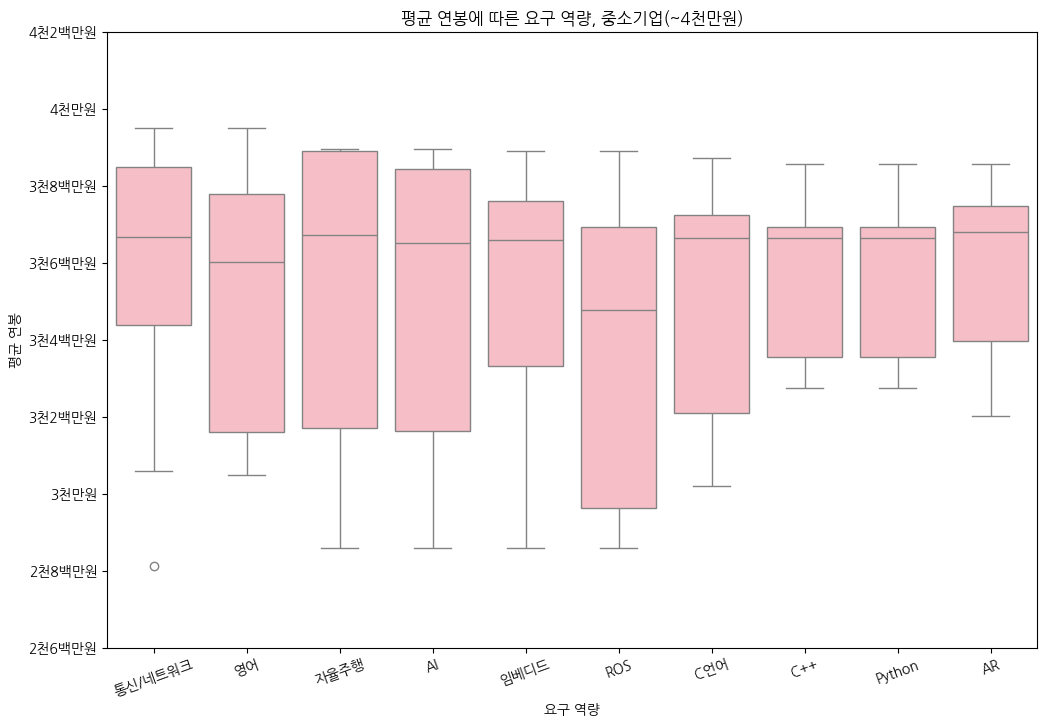

In [215]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=res3_2['요구 역량'], y=res3_2['평균 연봉'], color="lightpink")
plt.xticks(rotation=20)
ax = plt.gca()
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(
        lambda x, _: f'{int(x/1e7)}천{(f"{int((x/1e6)%10)}백만원" if int((x/1e6)%10) != 0 else "만원")}'
    )
)
plt.ylim([26000000, 42000000])
plt.title('평균 연봉에 따른 요구 역량, 중소기업(~4천만원)')
plt.show()

## 시각화 필요!!

## 3. 월별 기술 수요 변화

제 생각엔 그때그때 기업에서 필요한 자리 생길 때마다 구인하는 거라 월별 기술 수요 패턴이 정해져 있을지 모르겠지만..
최대한 그럴싸하게 해봤습니다.

In [21]:
sql4 = "select month(r.posted_date) as month, t.tech_name, count(*) as mention_count from recruit r join recruit_tech rt on r.recruit_id = rt.recruit_id join tech t on rt.tech_id = t.tech_id where r.posted_date is not null and t.tech_name not like 'S/W' and t.tech_name not like '솔루션' group by month, t.tech_name order by month, mention_count desc;"

tech 키워드에 'S/W'와 '솔루션'이 너무 과하게 집계돼 제외하고 출력했습니다.

In [22]:
cur.execute(sql4)

data4= cur.fetchall()

In [23]:
df4 = pd.DataFrame(data=data4, columns=["월", "기술 이름", "언급 횟수"])
df4.set_index("월", inplace=True)
df4


,기술 이름,언급 횟수
월,,
2,임베디드,2
2,.NET,1
2,AI,1
2,API,1
2,AWS,1
...,...,...
10,Git,1
10,Python,1
10,딥러닝,1


In [24]:
test = "select posted_date, month(posted_date) from recruit where posted_date is not null order by posted_date desc;"

In [25]:
cur.execute(test)

cur.fetchall()

[(datetime.date(2024, 10, 1), 10),
 (datetime.date(2024, 9, 28), 9),
 (datetime.date(2024, 9, 28), 9),
 (datetime.date(2024, 9, 27), 9),
 (datetime.date(2024, 9, 27), 9),
 (datetime.date(2024, 9, 27), 9),
 (datetime.date(2024, 9, 27), 9),
 (datetime.date(2024, 9, 27), 9),
 (datetime.date(2024, 9, 27), 9),
 (datetime.date(2024, 9, 27), 9),
 (datetime.date(2024, 9, 27), 9),
 (datetime.date(2024, 9, 27), 9),
 (datetime.date(2024, 9, 27), 9),
 (datetime.date(2024, 9, 27), 9),
 (datetime.date(2024, 9, 27), 9),
 (datetime.date(2024, 9, 27), 9),
 (datetime.date(2024, 9, 27), 9),
 (datetime.date(2024, 9, 27), 9),
 (datetime.date(2024, 9, 27), 9),
 (datetime.date(2024, 9, 27), 9),
 (datetime.date(2024, 9, 27), 9),
 (datetime.date(2024, 9, 27), 9),
 (datetime.date(2024, 9, 27), 9),
 (datetime.date(2024, 9, 27), 9),
 (datetime.date(2024, 9, 27), 9),
 (datetime.date(2024, 9, 27), 9),
 (datetime.date(2024, 9, 27), 9),
 (datetime.date(2024, 9, 27), 9),
 (datetime.date(2024, 9, 27), 9),
 (datetime.da

#### 24년 10월 1일 공고문까지 긁어오신 대단한 팀원분들

## 4. 내 역량을 언급한 기업 조회

In [26]:
sql_mycompany = "select c.comp_name, c.comp_form, count(*) as demand_count from company c join recruit r on c.comp_id = r.comp_id join recruit_tech rt on r.recruit_id = rt.recruit_id join tech t on rt.tech_id = t.tech_id where t.tech_name in ('python', 'C언어', 'MYSQL', 'C++') and c.comp_form is not null group by c.comp_name order by demand_count desc, comp_form asc limit 10;"

In [180]:
cur.execute("""WITH RankedCompanies AS (
    SELECT 
        c.comp_name,
        c.comp_form,
        r.post_title,
        COUNT(*) AS demand_count,
        ROW_NUMBER() OVER (PARTITION BY c.comp_name ORDER BY COUNT(*) DESC) AS rn
    FROM 
        company c
    JOIN 
        recruit r ON c.comp_id = r.comp_id
    JOIN 
        recruit_tech rt ON r.recruit_id = rt.recruit_id
    JOIN 
        tech t ON rt.tech_id = t.tech_id
    WHERE 
        t.tech_name IN ('python', 'C언어', 'MYSQL', 'C++') 
        AND c.comp_form IS NOT NULL 
        AND (
            r.post_title NOT LIKE '%품질%' 
            AND r.post_title NOT LIKE '%교육%' 
            AND r.post_title NOT LIKE '%기획%' 
            AND r.post_title NOT LIKE '%투자%' 
            AND r.post_title NOT LIKE '%Manager%' 
            AND r.post_title NOT LIKE '%영업%' 
            AND r.post_title NOT LIKE '%마케팅%' 
            AND r.post_title NOT LIKE '%인사%' 
            AND r.post_title NOT LIKE '%총무%' 
            AND r.post_title NOT LIKE '%웹%' 
            AND r.post_title NOT LIKE '%백앤드%' 
            AND r.post_title NOT LIKE '%백엔드%' 
            AND r.post_title NOT LIKE '%기구%' 
            AND r.post_title NOT LIKE '%설계%' 
            AND r.post_title NOT LIKE '%프론트엔드%' 
            AND r.post_title NOT LIKE '%Front-end%' 
            AND r.post_title NOT LIKE '%임베디드%' 
            AND r.post_title NOT LIKE '%담당자%' 
            AND r.post_title NOT LIKE '%PM%'
        )
    GROUP BY 
        c.comp_name, c.comp_form, r.post_title
)
SELECT 
    comp_name,
    comp_form,
    post_title,
    demand_count
FROM 
    RankedCompanies
WHERE 
    rn = 1
ORDER BY 
    demand_count DESC, 
    comp_form ASC
LIMIT 10;""")

data_mycompany = cur.fetchall()

In [308]:
cur.execute("""select 
    c.comp_name,
    c.comp_form,
    c.sector,
    c.comp_url,
    count(*) as demand_count
from 
    company c
join 
    recruit r on c.comp_id = r.comp_id
join 
    recruit_tech rt on r.recruit_id = rt.recruit_id
join 
    tech t on rt.tech_id = t.tech_id
where 
    t.tech_name in ('python', 'C언어', 'MYSQL', 'C++') 
    and c.comp_form is not null 
    and (
        r.post_title not like '%품질%' 
        and r.post_title not like '%교육%' 
        and r.post_title not like '%기획%' 
        and r.post_title not like '%투자%' 
        and r.post_title not like '%Manager%' 
        and r.post_title not like '%영업%' 
        and r.post_title not like '%마케팅%' 
        and r.post_title not like '%인사%' 
        and r.post_title not like '%총무%' 
        and r.post_title not like '%웹%' 
        and r.post_title not like '%백앤드%' 
        and r.post_title not like '%백엔드%' 
        and r.post_title not like '%기구%' 
        and r.post_title not like '%설계%' 
        and r.post_title not like '%프론트엔드%' 
        and r.post_title not like '%Front-end%' 
        and r.post_title not like '%임베디드%' 
        and r.post_title not like '%담당자%' 
        and r.post_title not like '%PM%'
        and c.sector not like '%품질%'
        and c.sector not like '%교육%'
        and c.sector not like '%기획%'
        and c.sector not like '%투자%'
        and c.sector not like '%고용%'
        and c.sector not like '%영업%'
        and c.sector not like '%마케팅%'
        and c.sector not like '%인사%'
        and c.sector not like '%웹%'
        
    )
group by 
    c.comp_name
order by 
    demand_count desc, 
    comp_form desc
limit 10;""")

data_mycompany = cur.fetchall()

-> where t.tech_name in ('python', 'C언어', 'MYSQL', 'C++') 처럼 괄호 안에 사용자의 역량을 넣어서 조회 가능

참고로 comp_form이 null인 기업은 제외했습니다.

In [27]:
cur.execute(sql_mycompany)

data_mycompany = cur.fetchall()

In [154]:
import re

In [318]:
df_mycompany = pd.DataFrame(data=data_mycompany, columns=["기업 이름", "기업 형태", "직무", "url", "언급 횟수"])
for i in df_mycompany.index:
    if '중소' in df_mycompany.iloc[i][1]:
        df_mycompany.at[i, "기업 형태"] = '중소기업'
    elif '중견' in df_mycompany.iloc[i][1]:
        df_mycompany.at[i, "기업 형태"] = '중견기업'
    elif '대기업' in df_mycompany.iloc[i][1]:
        df_mycompany.at[i, "기업 형태"] = '대기업'

df_mycompany

/tmp/ipykernel_7481/1661199503.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if '중소' in df_mycompany.iloc[i][1]:
/tmp/ipykernel_7481/1661199503.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif '중견' in df_mycompany.iloc[i][1]:
/tmp/ipykernel_7481/1661199503.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif '대기업' in df_mycompany.iloc[i][1]:


,기업 이름,기업 형태,직무,url,언급 횟수
0,(주)옵트에이아이,중소기업,응용 소프트웨어 개발 및 공급업,www.opt-ai.kr,24
1,(주)비전스페이스,중소기업,응용 소프트웨어 개발 및 공급업,visionspace.co.kr,17
2,(주)알지에이아이엔씨,중소기업,전기ㆍ전자공학 연구개발업,www.rgarobot.com,15
3,(주)플라잎,중소기업,시스템 소프트웨어 개발 및 공급업,www.plaif.com,12
4,(주)뉴빌리티,중소기업,응용 소프트웨어 개발 및 공급업,www.neubility.co.kr,10
5,(주)시에라베이스,중소기업,응용 소프트웨어 개발 및 공급업,www.sierrabase.co.kr,9
6,(주)딥인사이트,중소기업,컴퓨터 프로그래밍 서비스업,https://www.dinsight.ai/,9
7,(주)케이티,대기업,무선 및 위성 통신업,www.kt.co.kr,7
8,(주)유진로봇,"코스닥, 외부감사법인, 수출입 기업",산업용 로봇 제조업,www.yujinrobot.com,7
9,(주)로보케어,중견기업,산업용 로봇 제조업,www.robocare.co.kr,7


저는 중소기업행입니다.

##### *해석 방법: 회사 A가 낸 모든 공고에서 python을 세 번, C++을 두 번 언급했다면, 그 회사에 대한 demand_count는 총 5가 될 것임.
##### *한계점: python, C++이 각각 어느 공고 어느 직무에서 몇 번 언급되었는지는 알 수 없음. 단지 '내가 갖춘 역량이 A 회사의 모든 공고에서 총 몇 번 언급됐나'에 대한 정보만 확인 가능.
##### recruit.mainjob에 tech 키워드가 저장되면 해결할 수 있음.

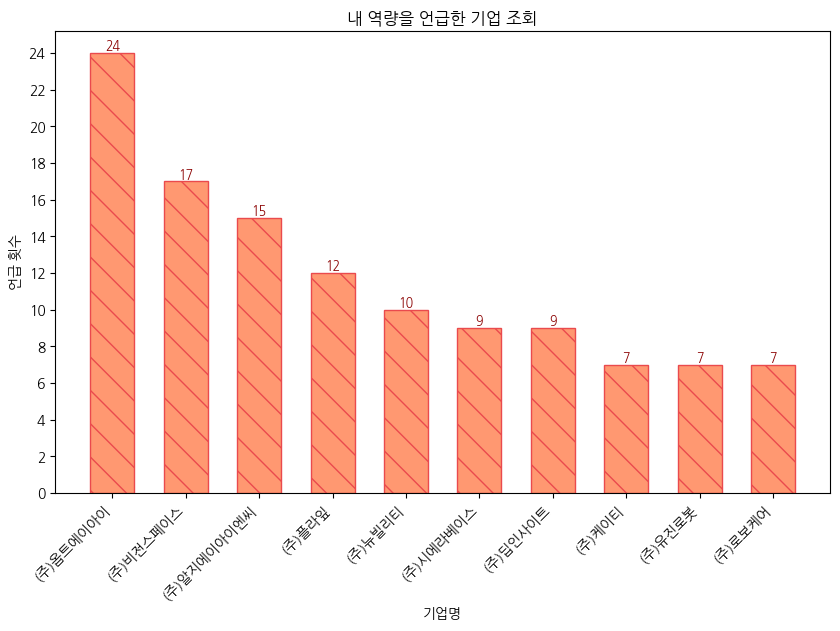

In [319]:

plt.figure(figsize=(10, 6))
bars = plt.bar(df_mycompany["기업 이름"], df_mycompany["언급 횟수"], color='#ff9871', edgecolor='#ea4a4d', hatch='\\', width=0.6)

# 각각의 막대에 수치를 추가
for bar in bars:
    yval = bar.get_height()  # 막대의 높이(값)
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval),
             ha='center', va='bottom', fontsize=9, color='darkred')

plt.xticks(rotation=45, ha='right')
plt.yticks(range(0, max(df_mycompany["언급 횟수"]) + 1, 2))
plt.title('내 역량을 언급한 기업 조회')
plt.xlabel('기업명')
plt.ylabel('언급 횟수')

plt.show()

##### 위 기업이 중소인지 중견인지 표시하려면 comp_form이 "중소기업, 스타트업, 연구소, 주식회사"처럼 긴 아이들을 "중소기업"으로 단순화해야할 것 같습니다!

/tmp/ipykernel_7481/2697324363.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_mycompany["기업 이름"], rotation=45, ha='right')
/tmp/ipykernel_7481/2697324363.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_mycompany["기업 이름"], rotation=45, ha='right', fontsize=6)


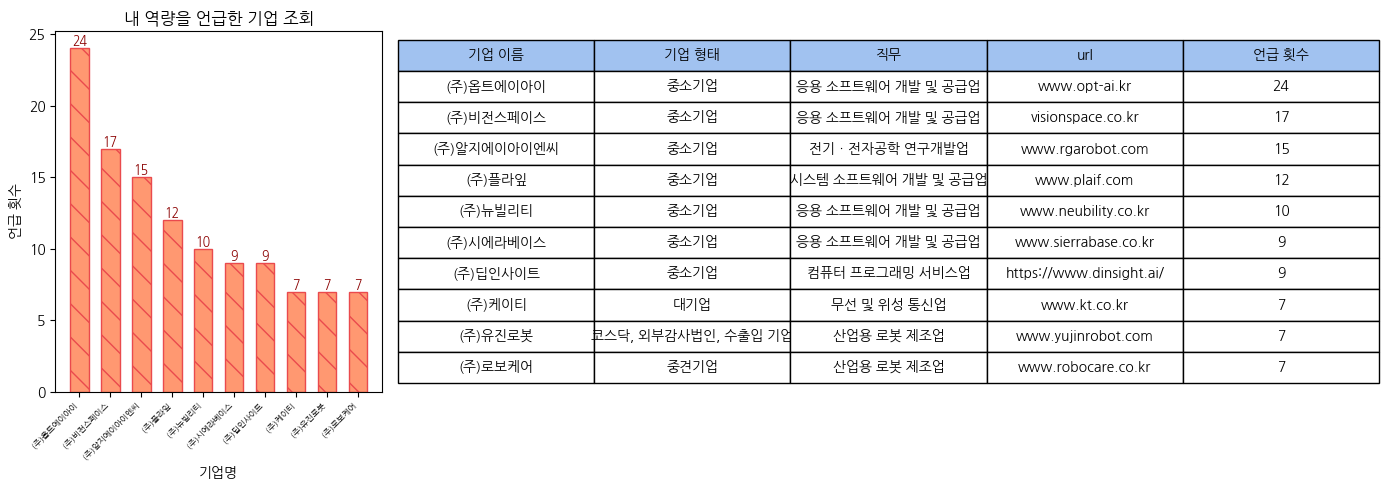

In [329]:
# Subplots: 왼쪽에는 그래프, 오른쪽에는 데이터프레임 테이블
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), gridspec_kw={'width_ratios': [1, 2]})

# 왼쪽 그래프 그리기
bars = ax1.bar(df_mycompany["기업 이름"], df_mycompany["언급 횟수"], color='#ff9871', edgecolor='#ea4a4d', hatch='\\', width=0.6)

# 막대 끝에 값 추가
for bar in bars:
    yval = bar.get_height()  # 막대의 높이(값)
    ax1.text(bar.get_x() + bar.get_width()/2, yval, int(yval),
             ha='center', va='bottom', fontsize=9, color='darkred')

# 그래프 속성 설정
ax1.set_xticklabels(df_mycompany["기업 이름"], rotation=45, ha='right')
ax1.set_title('내 역량을 언급한 기업 조회')
ax1.set_xticklabels(df_mycompany["기업 이름"], rotation=45, ha='right', fontsize=6)
ax1.set_xlabel('기업명')
ax1.set_ylabel('언급 횟수')

# 오른쪽에 데이터프레임 테이블 추가
ax2.axis('tight')
ax2.axis('off')
table = ax2.table(cellText=df_mycompany.values, colLabels=df_mycompany.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 2)
for col in range(len(df_mycompany.columns)):
    table[(0, col)].set_facecolor("#a1c2f0") 
# 레이아웃 조정 및 그래프 보여주기
plt.tight_layout()
plt.show()

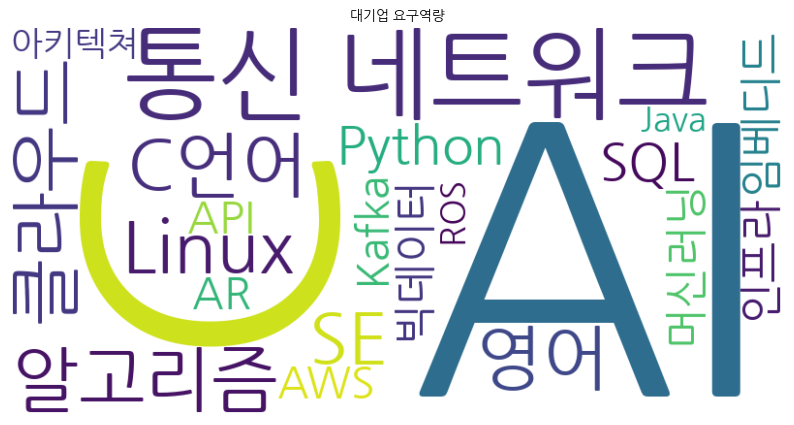

In [145]:
from wordcloud import WordCloud
import koreanize_matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
# 한글 폰트 설정 (NanumGothic 폰트 사용)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 시스템에 맞는 폰트 경로 설정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
# 요구 역량 빈도수 시각화
wordcloud = WordCloud(
    font_path=font_path,  # 한글 폰트 경로 설정
    width=800,
    height=400,
    background_color='white'
).generate(' '.join(res['요구 역량']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('대기업 요구역량', fontsize=10)
plt.show()

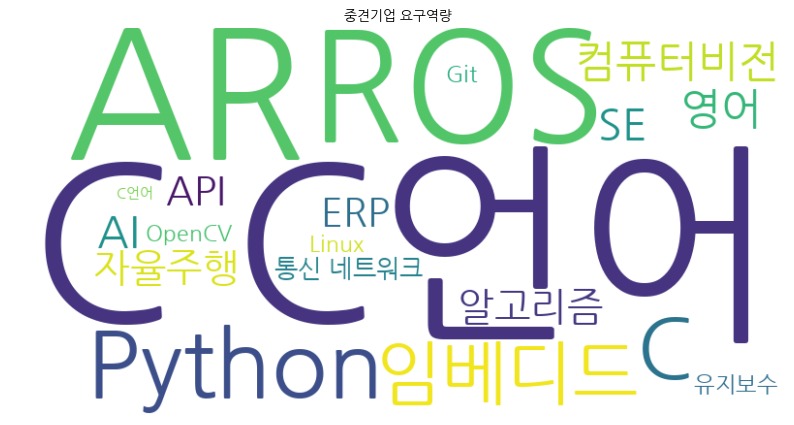

In [144]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 시스템에 맞는 폰트 경로 설정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
# 요구 역량 빈도수 시각화
wordcloud = WordCloud(
    font_path=font_path,  # 한글 폰트 경로 설정
    width=800,
    height=400,
    background_color='white'
).generate(' '.join(res2['요구 역량']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('중견기업 요구역량', fontsize=10)
plt.show()

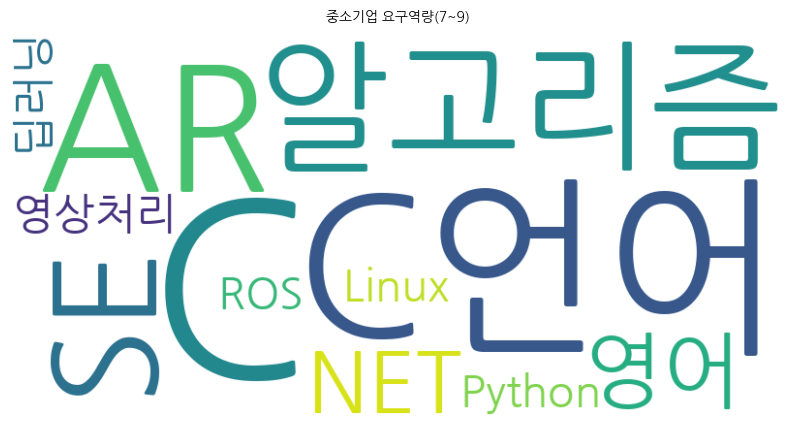

In [142]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 시스템에 맞는 폰트 경로 설정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
# 요구 역량 빈도수 시각화
wordcloud = WordCloud(
    font_path=font_path,  # 한글 폰트 경로 설정
    width=800,
    height=400,
    background_color='white'
).generate(' '.join(res3['요구 역량']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('중소기업 요구역량(7~9)', fontsize=10)
plt.show()

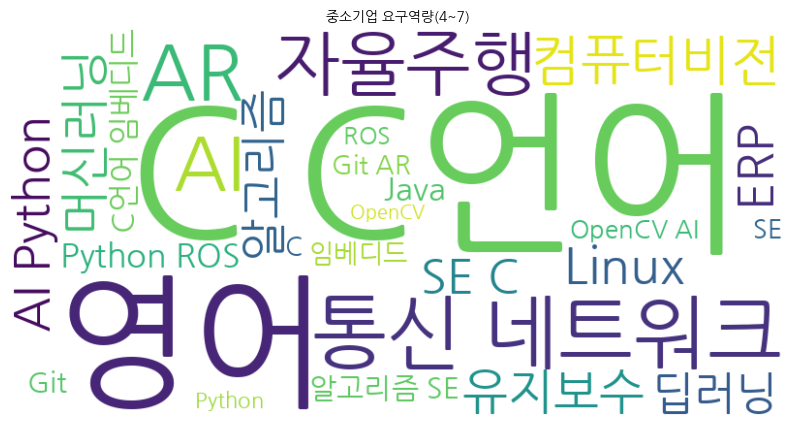

In [149]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 시스템에 맞는 폰트 경로 설정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
# 요구 역량 빈도수 시각화
wordcloud = WordCloud(
    font_path=font_path,  # 한글 폰트 경로 설정
    width=800,
    height=400,
    background_color='white'
).generate(' '.join(res3_1['요구 역량']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('중소기업 요구역량(4~7)', fontsize=10)
plt.show()

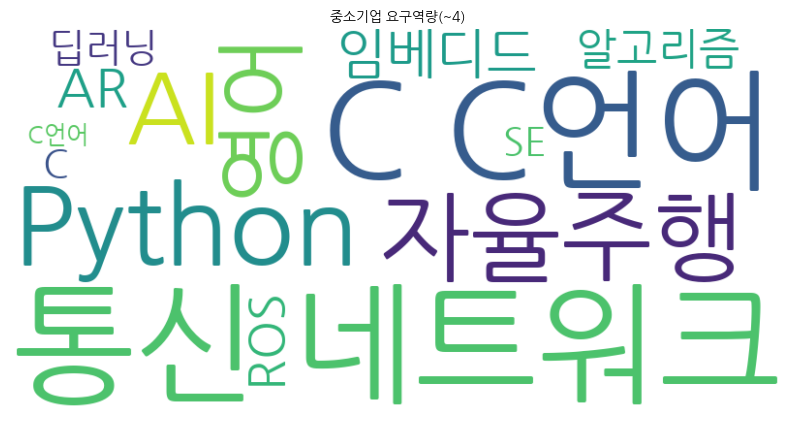

In [150]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 시스템에 맞는 폰트 경로 설정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
# 요구 역량 빈도수 시각화
wordcloud = WordCloud(
    font_path=font_path,  # 한글 폰트 경로 설정
    width=800,
    height=400,
    background_color='white'
).generate(' '.join(res3_2['요구 역량']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('중소기업 요구역량(~4)', fontsize=10)
plt.show()

In [280]:
call = "select comp_id, revenue2021 from company"

cur.execute(call)

call_data = cur.fetchall()

In [281]:
call_data

[(1, None),
 (2, None),
 (3, None),
 (4, ' 9억 3,005만원'),
 (5, None),
 (6, None),
 (7, ' 41억 3,016만원'),
 (8, ' 397억 8,685만원'),
 (9, None),
 (10, ' 448억 6,803만원'),
 (11, None),
 (12, ' 5억 8,349만원'),
 (13, None),
 (14, ' 845억 2,979만원'),
 (15, None),
 (16, None),
 (17, None),
 (18, None),
 (19, None),
 (20, None),
 (21, ' 14억 345만원'),
 (22, None),
 (23, ' 36억 5,251만원'),
 (24, ' 32억 9,729만원'),
 (25, None),
 (26, None),
 (27, None),
 (28, None),
 (29, None),
 (30, ' 18억 4,497만원'),
 (31, ' 485억 1,178만원'),
 (32, ' 57억 1,832만원'),
 (33, None),
 (34, None),
 (35, None),
 (36, ' 15억 4,032만원'),
 (37, None),
 (38, None),
 (39, None),
 (40, None),
 (41, None),
 (42, None),
 (43, ' 27억 890만원'),
 (44, None),
 (45, ' 44억 278만원'),
 (46, ' 91억 3,305만원'),
 (47, None),
 (48, None),
 (49, None),
 (50, None),
 (51, None),
 (52, None),
 (53, ' 2,551억 9,366만원'),
 (54, None),
 (55, None),
 (56, None),
 (57, ' 78억 1,462만원'),
 (58, ' 176억 5,787만원'),
 (59, None),
 (60, None),
 (61, None),
 (62, ' 4억 218만원'),
 (63, 

In [283]:
call2022 = "select comp_id, revenue2022 from company"

cur.execute(call2022)

call_data2022 = cur.fetchall()

In [284]:
call_data2022

[(1, None),
 (2, None),
 (3, None),
 (4, ' 18억 8,735만원'),
 (5, None),
 (6, None),
 (7, ' 64억 6,905만원'),
 (8, ' 455억 8,965만원'),
 (9, None),
 (10, ' 498억 4,434만원'),
 (11, None),
 (12, ' 9억 5,469만원'),
 (13, None),
 (14, ' 785억 2,159만원'),
 (15, None),
 (16, None),
 (17, None),
 (18, '- 3,542만원'),
 (19, None),
 (20, None),
 (21, ' 15억 8,500만원'),
 (22, None),
 (23, ' 40억 4,938만원'),
 (24, ' 36억 7,443만원'),
 (25, None),
 (26, None),
 (27, None),
 (28, None),
 (29, None),
 (30, ' 16억 3,051만원'),
 (31, ' 488억 8,111만원'),
 (32, ' 77억 3,705만원'),
 (33, ' 4,400만원'),
 (34, None),
 (35, None),
 (36, None),
 (37, None),
 (38, None),
 (39, None),
 (40, None),
 (41, None),
 (42, None),
 (43, ' 45억 2,543만원'),
 (44, None),
 (45, ' 52억 5,426만원'),
 (46, ' 122억 6,150만원'),
 (47, None),
 (48, None),
 (49, None),
 (50, None),
 (51, None),
 (52, None),
 (53, ' 2,912억 4,955만원'),
 (54, None),
 (55, None),
 (56, None),
 (57, ' 89억 4,700만원'),
 (58, ' 207억 5,160만원'),
 (59, None),
 (60, None),
 (61, None),
 (62, ' 5억 4,36

In [279]:
call2023 = "select comp_id, revenue2023 from company"

cur.execute(call2023)

call_data2023 = cur.fetchall()

In [265]:
call_data2023

[(1, None),
 (2, None),
 (3, None),
 (4, ' 24억 7,500만원'),
 (5, ' 8,127만원'),
 (6, None),
 (7, ' 72억 2,812만원'),
 (8, ' 433억 4,987만원'),
 (9, None),
 (10, None),
 (11, ' 1억 2,047만원'),
 (12, ' 18억 5,523만원'),
 (13, None),
 (14, ' 837억 4,772만원'),
 (15, None),
 (16, None),
 (17, None),
 (18, '- 7억 2,246만원'),
 (19, None),
 (20, None),
 (21, ' 10억 6,480만원'),
 (22, None),
 (23, None),
 (24, ' 35억 6,245만원'),
 (25, None),
 (26, ' 4,000만원'),
 (27, None),
 (28, None),
 (29, None),
 (30, None),
 (31, ' 495억 2,332만원'),
 (32, ' 55억 6,200만원'),
 (33, ' 2억 8,093만원'),
 (34, None),
 (35, None),
 (36, None),
 (37, None),
 (38, None),
 (39, None),
 (40, None),
 (41, ' 5,364만원'),
 (42, None),
 (43, ' 60억 2,666만원'),
 (44, None),
 (45, ' 65억 3,593만원'),
 (46, ' 84억 5,004만원'),
 (47, None),
 (48, None),
 (49, None),
 (50, None),
 (51, None),
 (52, None),
 (53, ' 3,358억 9,825만원'),
 (54, None),
 (55, None),
 (56, None),
 (57, ' 108억 2,949만원'),
 (58, ' 229억 118만원'),
 (59, None),
 (60, None),
 (61, None),
 (62, ' 15억 6,

In [266]:
import re

In [286]:
for comp_id in call_data:
    comp_id2 = comp_id[0] 
    text = comp_id[1]

    if text is not None:
        pattern = r'\s*(\d+)조\s*(\d+)억\s*(\d+),(\d+)만원'
        match = re.match(pattern, text)

        pattern2 = r'\s*(\d+)조\s*(\d+)억\s*(\d+)만원'
        match2 = re.match(pattern2, text)

        pattern3 = r'\s*(\d+)억\s*(\d+)만원'
        match3 = re.match(pattern3, text)

        pattern4 = r'\s*(\d+)억\s*(\d+),(\d+)만원'
        match4 = re.match(pattern4, text)

        pattern5 = r'\s*(\d+),(\d+)만원'
        match5 = re.match(pattern5, text)

        if match:
            jo = int(match.group(1)) * 1000000000000
            uk = int(match.group(2)) * 100000000
            man = int(match.group(3)) * 10000000 + int(match.group(4))*10000
            total = jo + uk + man
            print(comp_id, "match1:",total)
            input = "update company set revenue2021int=%s where comp_id=%s"
            #input = "insert into company(revenue2021int) values (%s)"
            cur.execute(input,(total, comp_id2))

        if match2:
            jo = int(match2.group(1)) * 1000000000000
            uk = int(match2.group(2)) * 100000000
            man = int(match2.group(3)) * 10000
            total = jo + uk + man
            print(comp_id,"match2:",total)
            input = "update company set revenue2021int=%s where comp_id=%s"
            #input = "insert into company(revenue2021int) values (%s)"
            cur.execute(input,(total, comp_id2))  

        if match3:
            uk = int(match3.group(1)) * 100000000
            man = int(match3.group(2)) * 10000
            total = uk + man
            print(comp_id,"match3:",total)
            input = "update company set revenue2021int=%s where comp_id=%s"
            #input = "insert into company(revenue2021int) values (%s)"
            cur.execute(input,(total,comp_id2)) 

        if match4:
            uk = int(match4.group(1)) * 100000000
            man = int(match4.group(2)) * 10000000 + int(match4.group(3))*10000
            total = uk + man
            print(comp_id,"match4:",total)
            input = "update company set revenue2021int=%s where comp_id=%s"
            #input = "insert into company(revenue2021int) values (%s)"
            cur.execute(input,(total,comp_id2))

        if match5:
            man = int(match5.group(1)) * 10000000 + int(match5.group(2))*10000
            total = man
            print(comp_id,"match1:",total)
            input = "update company set revenue2021int=%s where comp_id=%s"
           # input = "insert into company(revenue2021int) values (%s)"
            cur.execute(input,(total,comp_id2))

            

    else:
        print(comp_id, "It is Null")
        input = "update company set revenue2021int=0 where comp_id=%s"
        #input = "insert into company(revenue2021int) values (0)"
        cur.execute(input, (comp_id2,))


remote.commit()

(1, None) It is Null
(2, None) It is Null
(3, None) It is Null
(4, ' 9억 3,005만원') match4: 930050000
(5, None) It is Null
(6, None) It is Null
(7, ' 41억 3,016만원') match4: 4130160000
(8, ' 397억 8,685만원') match4: 39786850000
(9, None) It is Null
(10, ' 448억 6,803만원') match4: 44868030000
(11, None) It is Null
(12, ' 5억 8,349만원') match4: 583490000
(13, None) It is Null
(14, ' 845억 2,979만원') match4: 84529790000
(15, None) It is Null
(16, None) It is Null
(17, None) It is Null
(18, None) It is Null
(19, None) It is Null
(20, None) It is Null
(21, ' 14억 345만원') match3: 1403450000
(22, None) It is Null
(23, ' 36억 5,251만원') match4: 3652510000
(24, ' 32억 9,729만원') match4: 3297290000
(25, None) It is Null
(26, None) It is Null
(27, None) It is Null
(28, None) It is Null
(29, None) It is Null
(30, ' 18억 4,497만원') match4: 1844970000
(31, ' 485억 1,178만원') match4: 48511780000
(32, ' 57억 1,832만원') match4: 5718320000
(33, None) It is Null
(34, None) It is Null
(35, None) It is Null
(36, ' 15억 4,032만원') 

In [276]:
call_data2022

[(1, None),
 (2, None),
 (3, None),
 (4, ' 18억 8,735만원'),
 (5, None),
 (6, None),
 (7, ' 64억 6,905만원'),
 (8, ' 455억 8,965만원'),
 (9, None),
 (10, ' 498억 4,434만원'),
 (11, None),
 (12, ' 9억 5,469만원'),
 (13, None),
 (14, ' 785억 2,159만원'),
 (15, None),
 (16, None),
 (17, None),
 (18, '- 3,542만원'),
 (19, None),
 (20, None),
 (21, ' 15억 8,500만원'),
 (22, None),
 (23, ' 40억 4,938만원'),
 (24, ' 36억 7,443만원'),
 (25, None),
 (26, None),
 (27, None),
 (28, None),
 (29, None),
 (30, ' 16억 3,051만원'),
 (31, ' 488억 8,111만원'),
 (32, ' 77억 3,705만원'),
 (33, ' 4,400만원'),
 (34, None),
 (35, None),
 (36, None),
 (37, None),
 (38, None),
 (39, None),
 (40, None),
 (41, None),
 (42, None),
 (43, ' 45억 2,543만원'),
 (44, None),
 (45, ' 52억 5,426만원'),
 (46, ' 122억 6,150만원'),
 (47, None),
 (48, None),
 (49, None),
 (50, None),
 (51, None),
 (52, None),
 (53, ' 2,912억 4,955만원'),
 (54, None),
 (55, None),
 (56, None),
 (57, ' 89억 4,700만원'),
 (58, ' 207억 5,160만원'),
 (59, None),
 (60, None),
 (61, None),
 (62, ' 5억 4,36

In [287]:
for comp_id in call_data2022:
    text = comp_id[1]
    comp_id2 = comp_id[0] 

    if text is not None:
        pattern = r'\s*(\d+)조\s*(\d+)억\s*(\d+),(\d+)만원'
        match = re.match(pattern, text)

        pattern2 = r'\s*(\d+)조\s*(\d+)억\s*(\d+)만원'
        match2 = re.match(pattern2, text)

        pattern3 = r'\s*(\d+)억\s*(\d+)만원'
        match3 = re.match(pattern3, text)

        pattern4 = r'\s*(\d+)억\s*(\d+),(\d+)만원'
        match4 = re.match(pattern4, text)

        pattern5 = r'\s*(\d+),(\d+)만원'
        match5 = re.match(pattern5, text)

        if match:
            jo = int(match.group(1)) * 1000000000000
            uk = int(match.group(2)) * 100000000
            man = int(match.group(3)) * 10000000 + int(match.group(4))*10000
            total = jo + uk + man
            print(comp_id, "match1:",total)
            input = "update company set revenue2022int=%s where comp_id=%s"
            cur.execute(input,(total,comp_id2))

        if match2:
            jo = int(match2.group(1)) * 1000000000000
            uk = int(match2.group(2)) * 100000000
            man = int(match2.group(3)) * 10000
            total = jo + uk + man
            print(comp_id,"match2:",total)
            input = "update company set revenue2022int=%s where comp_id=%s"
            cur.execute(input,(total,comp_id2))  

        if match3:
            uk = int(match3.group(1)) * 100000000
            man = int(match3.group(2)) * 10000
            total = uk + man
            print(comp_id,"match3:",total)
            input = "update company set revenue2022int=%s where comp_id=%s"
            cur.execute(input,(total,comp_id2)) 

        if match4:
            uk = int(match4.group(1)) * 100000000
            man = int(match4.group(2)) * 10000000 + int(match4.group(3))*10000
            total = uk + man
            print(comp_id,"match4:",total)
            input = "update company set revenue2022int=%s where comp_id=%s"
            cur.execute(input,(total,comp_id2))

        if match5:
            man = int(match5.group(1)) * 10000000 + int(match5.group(2))*10000
            total = man
            print(comp_id,"match1:",total)
            input = "update company set revenue2022int=%s where comp_id=%s"
            cur.execute(input,(total,comp_id2))

            

    else:
        print(comp_id, "It is Null")
        input = "update company set revenue2022int=0 where comp_id=%s"
        #input = "insert into company(revenue2022int) values (0)"
        cur.execute(input, (comp_id2,))

remote.commit()

(1, None) It is Null
(2, None) It is Null
(3, None) It is Null
(4, ' 18억 8,735만원') match4: 1887350000
(5, None) It is Null
(6, None) It is Null
(7, ' 64억 6,905만원') match4: 6469050000
(8, ' 455억 8,965만원') match4: 45589650000
(9, None) It is Null
(10, ' 498억 4,434만원') match4: 49844340000
(11, None) It is Null
(12, ' 9억 5,469만원') match4: 954690000
(13, None) It is Null
(14, ' 785억 2,159만원') match4: 78521590000
(15, None) It is Null
(16, None) It is Null
(17, None) It is Null
(19, None) It is Null
(20, None) It is Null
(21, ' 15억 8,500만원') match4: 1585000000
(22, None) It is Null
(23, ' 40억 4,938만원') match4: 4049380000
(24, ' 36억 7,443만원') match4: 3674430000
(25, None) It is Null
(26, None) It is Null
(27, None) It is Null
(28, None) It is Null
(29, None) It is Null
(30, ' 16억 3,051만원') match4: 1630510000
(31, ' 488억 8,111만원') match4: 48881110000
(32, ' 77억 3,705만원') match4: 7737050000
(33, ' 4,400만원') match1: 44000000
(34, None) It is Null
(35, None) It is Null
(36, None) It is Null
(37, 

In [288]:
for comp_id in call_data2023:
    comp_id2 = comp_id[0]
    text = comp_id[1]

    if text is not None:
        pattern = r'\s*(\d+)조\s*(\d+)억\s*(\d+),(\d+)만원'
        match = re.match(pattern, text)

        pattern2 = r'\s*(\d+)조\s*(\d+)억\s*(\d+)만원'
        match2 = re.match(pattern2, text)

        pattern3 = r'\s*(\d+)억\s*(\d+)만원'
        match3 = re.match(pattern3, text)

        pattern4 = r'\s*(\d+)억\s*(\d+),(\d+)만원'
        match4 = re.match(pattern4, text)

        pattern5 = r'\s*(\d+),(\d+)만원'
        match5 = re.match(pattern5, text)

        if match:
            jo = int(match.group(1)) * 1000000000000
            uk = int(match.group(2)) * 100000000
            man = int(match.group(3)) * 10000000 + int(match.group(4))*10000
            total = jo + uk + man
            print(comp_id, "match1:",total)
            input = "update company set revenue2023int=%s where comp_id=%s"
            cur.execute(input,(total,comp_id2))
            

        if match2:
            jo = int(match2.group(1)) * 1000000000000
            uk = int(match2.group(2)) * 100000000
            man = int(match2.group(3)) * 10000
            total = jo + uk + man
            print(comp_id,"match2:",total)
            input = "update company set revenue2023int=%s where comp_id=%s"
            cur.execute(input,(total,comp_id2))
            

        if match3:
            uk = int(match3.group(1)) * 100000000
            man = int(match3.group(2)) * 10000
            total = uk + man
            print(comp_id,"match3:",total)
            input = "update company set revenue2023int=%s where comp_id=%s"
            cur.execute(input,(total,comp_id2))

        if match4:
            uk = int(match4.group(1)) * 100000000
            man = int(match4.group(2)) * 10000000 + int(match4.group(3))*10000
            total = uk + man
            print(comp_id,"match4:",total)
            input = "update company set revenue2023int=%s where comp_id=%s"
            cur.execute(input,(total,comp_id2))
            

        if match5:
            man = int(match5.group(1)) * 10000000 + int(match5.group(2))*10000
            total = man
            print(comp_id,"match1:",total)
            input = "update company set revenue2023int=%s where comp_id=%s"
            cur.execute(input,(total,comp_id2))

            

    else:

        input = "update company set revenue2023int=0 where comp_id=%s"
        cur.execute(input,(comp_id2,))


remote.commit()

(4, ' 24억 7,500만원') match4: 2475000000
(5, ' 8,127만원') match1: 81270000
(7, ' 72억 2,812만원') match4: 7228120000
(8, ' 433억 4,987만원') match4: 43349870000
(11, ' 1억 2,047만원') match4: 120470000
(12, ' 18억 5,523만원') match4: 1855230000
(14, ' 837억 4,772만원') match4: 83747720000
(21, ' 10억 6,480만원') match4: 1064800000
(24, ' 35억 6,245만원') match4: 3562450000
(26, ' 4,000만원') match1: 40000000
(31, ' 495억 2,332만원') match4: 49523320000
(32, ' 55억 6,200만원') match4: 5562000000
(33, ' 2억 8,093만원') match4: 280930000
(41, ' 5,364만원') match1: 53640000
(43, ' 60억 2,666만원') match4: 6026660000
(45, ' 65억 3,593만원') match4: 6535930000
(46, ' 84억 5,004만원') match4: 8450040000
(57, ' 108억 2,949만원') match4: 10829490000
(58, ' 229억 118만원') match3: 22901180000
(62, ' 15억 6,231만원') match4: 1562310000
(63, ' 145억 2,005만원') match4: 14520050000
(64, ' 235억 7,357만원') match4: 23573570000
(65, ' 214억 9,758만원') match4: 21497580000
(69, ' 34억 3,171만원') match4: 3431710000
(76, ' 28억 666만원') match3: 2806660000
(77, ' 33억 7,1

In [370]:
rev_increase = """SELECT 
    c.sector,
    SUM((c.revenue2023int - c.revenue2022int) + (c.revenue2022int - c.revenue2021int)) AS total_increase
FROM 
    company c
    join recruit r on c.comp_id = r.comp_id
WHERE 
    c.revenue2021int > 0 AND c.revenue2022int > 0 AND c.revenue2023int > 0
    AND c.sector IS NOT NULL
    and r.post_title not like '%품질%' 
        and r.post_title not like '%교육%' 
        and r.post_title not like '%기획%' 
        and r.post_title not like '%투자%' 
        and r.post_title not like '%Manager%' 
        and r.post_title not like '%영업%' 
        and r.post_title not like '%마케팅%' 
        and r.post_title not like '%인사%' 
        and r.post_title not like '%총무%' 
        and r.post_title not like '%웹%' 
        and r.post_title not like '%백앤드%' 
        and r.post_title not like '%백엔드%' 
        and r.post_title not like '%기구%' 
        and r.post_title not like '%설계%' 
        and r.post_title not like '%프론트엔드%' 
        and r.post_title not like '%Front-end%' 
        and r.post_title not like '%임베디드%' 
        and r.post_title not like '%담당자%' 
        and r.post_title not like '%PM%'
        and c.sector not like '%품질%'
        and c.sector not like '%교육%'
        and c.sector not like '%기획%'
        and c.sector not like '%투자%'
        and c.sector not like '%고용%'
        and c.sector not like '%영업%'
        and c.sector not like '%마케팅%'
        and c.sector not like '%인사%'
        and c.sector not like '%웹%'
GROUP BY 
    c.sector
ORDER BY 
    total_increase DESC
LIMIT 5;"""


In [371]:
cur.execute(rev_increase)

rev_inc = cur.fetchall()

SELECT 
    sector,
    SUM((revenue2023int - revenue2022int) + (revenue2022int - revenue2021int)) AS total_increase
FROM 
    company
WHERE 
    revenue2021int > 0 AND revenue2022int > 0 AND revenue2023int > 0
    AND sector IS NOT NULL
GROUP BY 
    sector
ORDER BY 
    total_increase DESC
LIMIT 10;

In [372]:
rev_res = pd.DataFrame(data=rev_inc, columns=['업종', '매출액 상승폭'])
rev_res.set_index("업종", inplace=True)
rev_res

,매출액 상승폭
업종,
산업용 로봇 제조업,60516090000
응용 소프트웨어 개발 및 공급업,57235730000
기타 엔지니어링 서비스업,32138790000
배전반 및 전기 자동제어반 제조업,28136860000
시스템 소프트웨어 개발 및 공급업,26668810000


In [376]:
avg_rev= """SELECT 
    c.sector,
    round(AVG((c.revenue2021int + c.revenue2022int + c.revenue2023int) / 3)) AS average_revenue
FROM 
    company c
    join recruit r on c.comp_id = r.comp_id
WHERE 
    c.revenue2021int > 0 AND c.revenue2022int > 0 AND c.revenue2023int > 0
    AND c.sector IS NOT NULL
    and r.post_title not like '%품질%' 
        and r.post_title not like '%교육%' 
        and r.post_title not like '%기획%' 
        and r.post_title not like '%투자%' 
        and r.post_title not like '%Manager%' 
        and r.post_title not like '%영업%' 
        and r.post_title not like '%마케팅%' 
        and r.post_title not like '%인사%' 
        and r.post_title not like '%총무%' 
        and r.post_title not like '%웹%' 
        and r.post_title not like '%백앤드%' 
        and r.post_title not like '%백엔드%' 
        and r.post_title not like '%기구%' 
        and r.post_title not like '%설계%' 
        and r.post_title not like '%프론트엔드%' 
        and r.post_title not like '%Front-end%' 
        and r.post_title not like '%임베디드%' 
        and r.post_title not like '%담당자%' 
        and r.post_title not like '%PM%'
        and c.sector not like '%품질%'
        and c.sector not like '%교육%'
        and c.sector not like '%기획%'
        and c.sector not like '%투자%'
        and c.sector not like '%고용%'
        and c.sector not like '%영업%'
        and c.sector not like '%마케팅%'
        and c.sector not like '%인사%'
        and c.sector not like '%웹%'
GROUP BY 
    c.sector
ORDER BY 
    average_revenue DESC
LIMIT 5;"""

In [377]:
cur.execute(avg_rev)

avg_res = cur.fetchall()

In [378]:
avg_df = pd.DataFrame(data=avg_res, columns=['업종', '3년간 매출액 평균'])
avg_df.set_index("업종", inplace=True)

avg_df

,3년간 매출액 평균
업종,
그 외 자동차용 신품 부품 제조업,88860640000
주형 및 금형 제조업,52890100000
전기용 기계ㆍ장비 및 관련 기자재 도매업,45728836667
그 외 기타 특수목적용 기계 제조업,42122738333
기타 엔지니어링 서비스업,38428753333
